## Mounting my drive so the files can be imported directly from Google Drive

---



In [ ]:
from google.colab import drive #imports necessary libraries for uplaoding from drive
drive.mount('/content/drive') #mounting my drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing Necessary libraries for Data Analysis

---



In [ ]:
                                                                                #importing:
import pandas as pd                                                             #Pandas Library
import numpy as np                                                              #Numpy Library
import seaborn as sb                                                            #Seaborn Library
import matplotlib.pyplot as plt                                                 #Matplot Library
from pandas.plotting import scatter_matrix                                      #Scatter-Plot Library
import statsmodels.api as stat                                                  #StatsModels Library
import math

## Reading the Data

---



In [ ]:
data = pd.read_csv('/content/drive/MyDrive/master.csv')#reading csv file using pandas functions
display (data)#printing glimpses of the read data

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


## **Q1 a.**

## Printing Dimensions of Data

In [ ]:
data.shape

(27820, 12)

In [ ]:
rows = data.shape[0] #pandas method which stores no. of rows
cols = data.shape[1] #pandas method which stores np. of columns 

to_print = 'The data has ' +str(rows) +' rows and ' +str(cols) +' columns' #constructing variable to print
print(to_print) #printing no. of rows and columns

The data has 27820 rows and 12 columns


## Printing the Number of Null Values and Unique Values in each column

In [ ]:
for cols in data.columns: #for loop
  null_nos = np.sum(pd.isnull(data[cols])) #finding null values

  print('The column ' +str(cols) +' has ' +str(null_nos) +' null values and ' +str(len(pd.unique(data[cols]) ))+ ' unique values.'   ) #printing null and unique values

The column country has 0 null values and 101 unique values.
The column year has 0 null values and 32 unique values.
The column sex has 0 null values and 2 unique values.
The column age has 0 null values and 6 unique values.
The column suicides_no has 0 null values and 2084 unique values.
The column population has 0 null values and 25564 unique values.
The column suicides/100k pop has 0 null values and 5298 unique values.
The column country-year has 0 null values and 2321 unique values.
The column HDI for year has 19456 null values and 306 unique values.
The column  gdp_for_year ($)  has 0 null values and 2321 unique values.
The column gdp_per_capita ($) has 0 null values and 2233 unique values.
The column generation has 0 null values and 6 unique values.


## Printing Datatypes of Columns 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


## Conclusion : All NaN values are present in only one of the columns, namely 'HDI for year'

In [ ]:
for col_og in data.columns:#for loop
  data[col_og] = data[col_og].replace([np.nan],0) #replacing w 0

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        27820 non-null  float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


## 'HDI for year' is now free of null values
All null values have now been replaced with 0



In [ ]:
display(data)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,0.000,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,0.000,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,0.000,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,0.000,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,0.000,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


## Renaming columns with spaces in their names 

In [ ]:
data.rename(columns={'suicides/100k pop':'Suicides100kPop', ' gdp_for_year ($) ':'GDPForYear',
                          'gdp_per_capita ($)':'GDPPerCapita'}, inplace=True)

## Removing spaces from column of GDP per year

In [ ]:
data.GDPForYear = data.GDPForYear.apply(lambda x : x.replace(",", ""))
data.GDPForYear = data.GDPForYear.astype('int64')

In [ ]:
df_col = data['GDPForYear']
minima = df_col.min()

print(minima)

print('In units of 10 million is:')
print(minima/10000000)

46919625
In units of 10 million is:
4.6919625


In [ ]:
df_col = data['GDPForYear']
maxima = df_col.max()

print(maxima)

print('In units of 10 million is:')
print(maxima/10000000)

18120714000000
In units of 10 million is:
1812071.4


## As we can see, since the column has a very wide range of values it makes sense to express it in units of 10 million

---



## Converting to units of 10 million

In [ ]:
data.GDPForYear = ((data.GDPForYear) / (10000000))
data.head()

,country,year,sex,age,suicides_no,population,Suicides100kPop,country-year,HDI for year,GDPForYear,GDPPerCapita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,0.0,215.66249,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,0.0,215.66249,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,0.0,215.66249,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,0.0,215.66249,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,0.0,215.66249,796,Boomers


In [ ]:
for col_og in data.columns:#for loop
  data[col_og] = data[col_og].replace([np.nan],0) #replacing w 0

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          27820 non-null  object 
 1   year             27820 non-null  int64  
 2   sex              27820 non-null  object 
 3   age              27820 non-null  object 
 4   suicides_no      27820 non-null  int64  
 5   population       27820 non-null  int64  
 6   Suicides100kPop  27820 non-null  float64
 7   country-year     27820 non-null  object 
 8   HDI for year     27820 non-null  float64
 9   GDPForYear       27820 non-null  float64
 10  GDPPerCapita     27820 non-null  int64  
 11  generation       27820 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 2.5+ MB


## Conclusion : GDP for year column had datatype 'object' earlier now it is a column of floats and we have represented GDP in units of 10 million


In [ ]:
del data['country-year']

## Displaying Data after Cleaning
The changes are apparent

In [ ]:
display(data)

,country,year,sex,age,suicides_no,population,Suicides100kPop,HDI for year,GDPForYear,GDPPerCapita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,0.000,215.662490,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,0.000,215.662490,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,0.000,215.662490,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,0.000,215.662490,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,0.000,215.662490,796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,0.675,6306.707718,2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,0.675,6306.707718,2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,0.675,6306.707718,2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,0.675,6306.707718,2309,Generation Z


## Plotting Histogram for Columns with Numerical Values

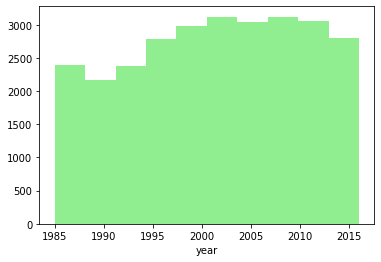

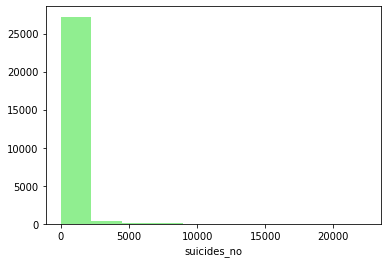

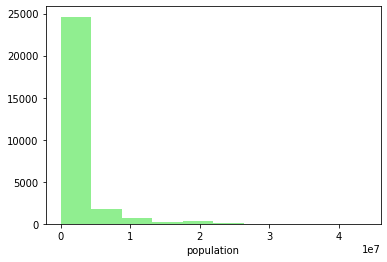

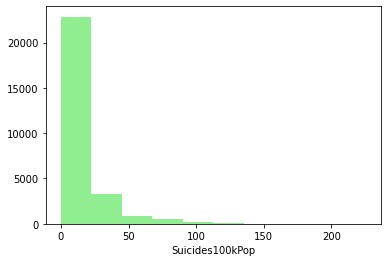

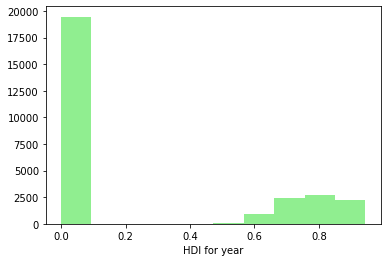

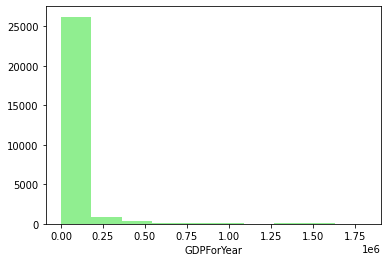

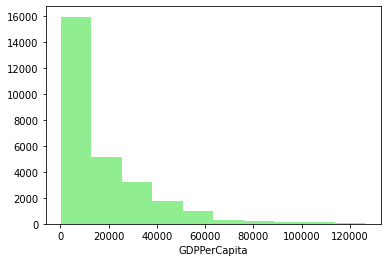

In [ ]:
for vertical_n in data.columns.values:
  if (data[vertical_n].dtypes == 'int64') | (data[vertical_n].dtypes == 'float64') :
    plt.hist(data[vertical_n], color = 'lightgreen')
    plt.xlabel(vertical_n)
    plt.show()
    #histograms have now been plotted

## Plotting Scatter Plot for Columns with Numerical Values

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5fe1b8e110>,
      dtype=object)

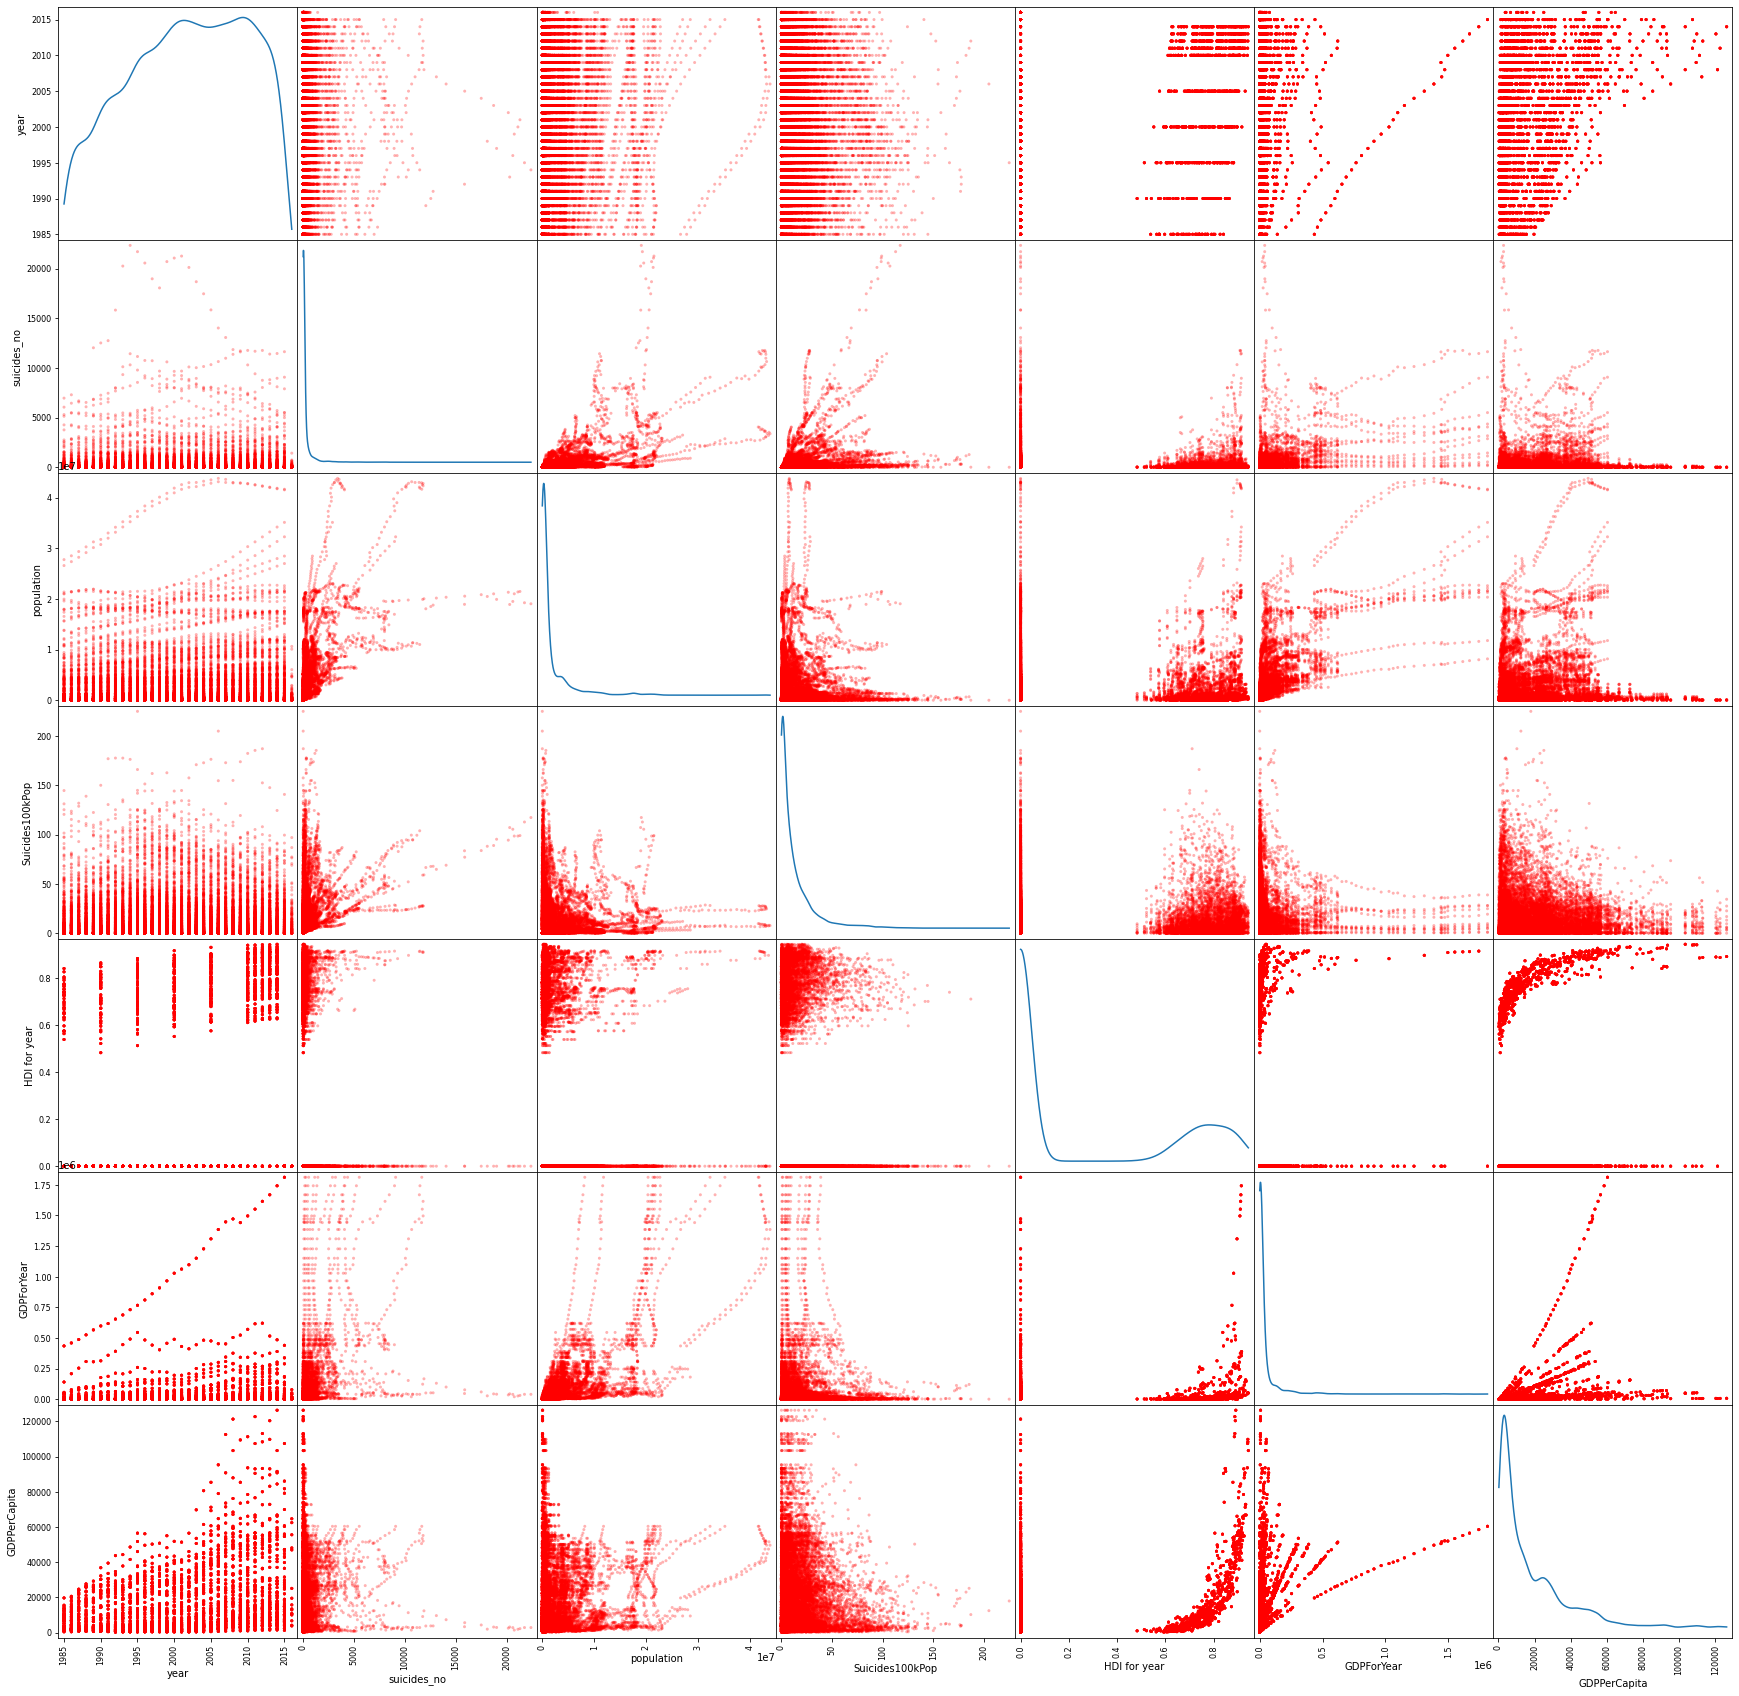

In [ ]:
scatter_matrix(data, alpha=0.3, figsize=(30,30), diagonal='kde', color ='red') #plotting scatter plot

## Plotting Correlation Matrix for Columns with Numerical Values

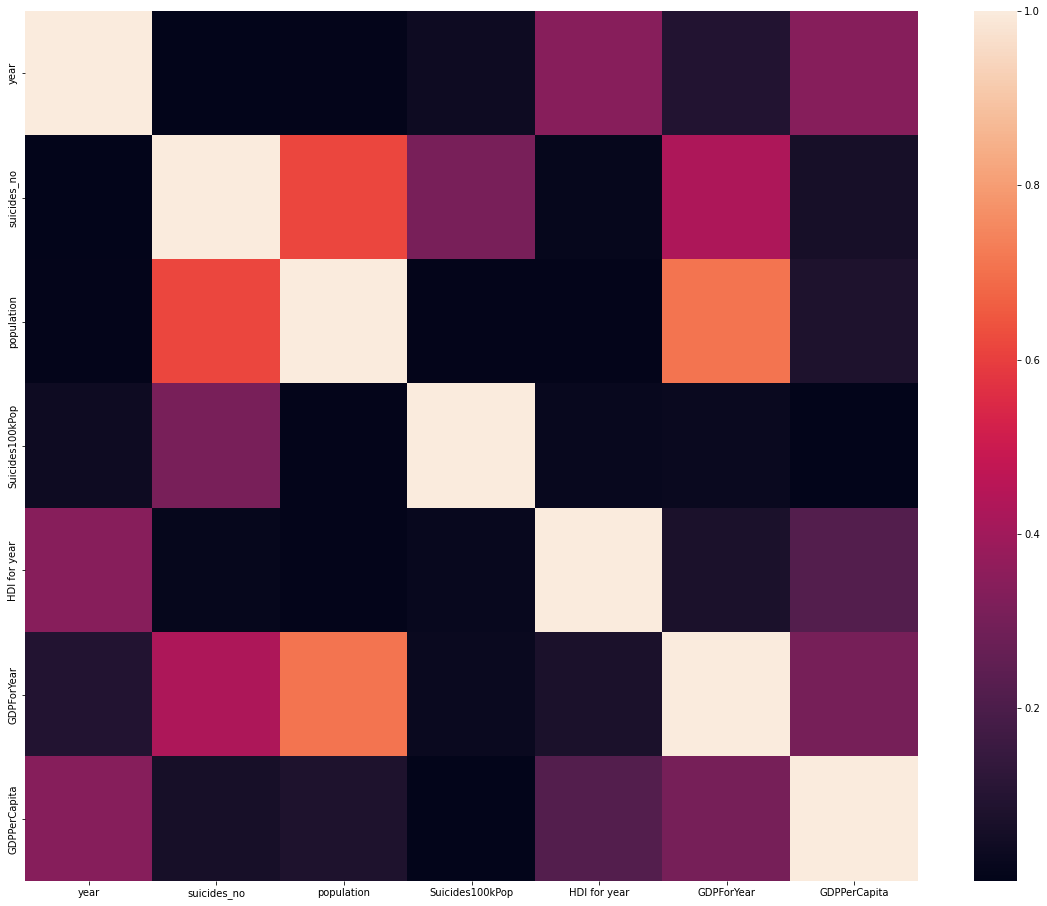

In [ ]:
corr_matrix = data.corr(method='pearson')
fig, ax=plt.subplots(figsize=(20,16))
sb.heatmap( abs (corr_matrix), annot = False)
sb.cubehelix_palette(as_cmap = True)
plt.show()

## Plotting Minima and Maxima to show the range of values spanned by columns with numerical data

In [ ]:
print(data['year'].min())
print(data['year'].max())
print(data['year'].dtype)

1985
2016
int64


In [ ]:
print(data['suicides_no'].min())
print(data['suicides_no'].max())
print(data['suicides_no'].dtype)

0
22338
int64


In [ ]:
print(data['population'].min())
print(data['population'].max())
print(data['population'].dtype)

278
43805214
int64


In [ ]:
#Suicides100kPop
print(data['Suicides100kPop'].min())
print(data['Suicides100kPop'].max())
print(data['Suicides100kPop'].dtype)

0.0
224.97
float64


In [ ]:
#HDI for HDI for year
print(data['HDI for year'].min())
print(data['HDI for year'].max())
print(data['HDI for year'].dtype)

0.0
0.944
float64


In [ ]:
print(data['GDPForYear'].min())
print(data['GDPForYear'].max())
print(data['GDPForYear'].dtype)

4.6919625
1812071.4
float64


In [ ]:
print(data['GDPPerCapita'].min())
print(data['GDPPerCapita'].max())
print(data['GDPPerCapita'].dtype)

251
126352
int64


## Conclusion

---



Continuous Variables: Suicides_no, Population, Suicides/100k,HDI for year, GDP/year, GDP per capita 

Discrete Variables: Country, Year,
Sex,
Generation,
Age-Group

## **Q1 b) i.**

---



In [ ]:
print('mode of country is:')
print(data['country'].mode())

print('\nmode of year is:')
print(data['year'].mode())

print('\nmode of sex is:')
print(data['sex'].mode())

print('\nmode of age is:')
print(data['age'].mode())

print('\nmode of generation is:')
print(data['generation'].mode())

mode of country is:
0        Austria
1        Iceland
2      Mauritius
3    Netherlands
dtype: object

mode of year is:
0    2009
dtype: int64

mode of sex is:
0    female
1      male
dtype: object

mode of age is:
0    15-24 years
1    25-34 years
2    35-54 years
3    55-74 years
4      75+ years
dtype: object

mode of generation is:
0    Generation X
dtype: object


## Modes of all discrete columns have been printed above

## **Q1 b. ii.**

---



In [ ]:
dxd = data['country'].value_counts() #counts no of times a value is repeated
print(dxd)
print(len(pd.unique(data['country']))) #no of unique values

Mauritius                 382
Austria                   382
Netherlands               382
Iceland                   382
Brazil                    372
                         ... 
Bosnia and Herzegovina     24
Cabo Verde                 12
Dominica                   12
Macau                      12
Mongolia                   10
Name: country, Length: 101, dtype: int64
101


Drawing inspiration from this we can say

In [ ]:
import math
dc=data['country'].value_counts()
pc = dc/(27820)#these are pi values for country col
#print(pc)

#iterating over all values to find the summation
entropy_country=0
for i in range(len(pd.unique(data['country']))):
  p_country = pc[i]
  if (p_country != 0 ): 
    log_country = math.log(pc[i])
  else :
    log_country = 0
  #print(p_country)
  e_country = -(p_country*log_country)
  entropy_country = entropy_country + e_country


print('Entropy for country is:')
print(entropy_country) 

Entropy for country is:
4.5121150465039195


In [ ]:
import math
da=data['age'].value_counts()
pa = da/(27820)#these are pi for age
#print(pc)

#iterating over all values to find the summation
entropy_age=0
for i in range(len(pd.unique(data['age']))):
  p_age = pa[i]
  if (p_age != 0 ): 
    log_age = math.log(pc[i])
  else :
    log_age = 0
  #print(p_country)
  e_age = -(p_age*log_age)
  entropy_age = entropy_age + e_age


print('Entropy for country is:')
print(entropy_age) 

Entropy for country is:
4.296911766687281


In [ ]:
import math
dg=data['generation'].value_counts()
pg = dg/(27820)#these are pi for generation
#print(pc)

#iterating over all values to find the summation
entropy_g=0
for i in range(len(pd.unique(data['generation']))):
  p_g = pg[i]
  if (p_g != 0 ): 
    log_g = math.log(pc[i])
  else :
    log_g = 0
  #print(p_country)
  e_g = -(p_g*log_g)
  entropy_g = entropy_g + e_g

  
print('Entropy for generation is:')
print(entropy_g) 

Entropy for generation is:
4.292107964087289


In [ ]:
import math
ds=data['sex'].value_counts()
ds = ds/(27820)#these are pi for sex
#print(pc)

#iterating over all values to find the summation
entropy_sex=0
for i in range(len(pd.unique(data['sex']))):
  p_sex = ds[i]
  if (p_sex != 0 ): 
    log_sex = math.log(pc[i])
  else :
    log_sex = 0
  #print(p_country)
  e_sex = -(p_sex*log_sex)
  entropy_sex = entropy_sex + e_sex

  
print('Entropy for sex is:')
print(entropy_sex) 

Entropy for sex is:
4.288089856870859


## **Q1 c) i.**

---



In [ ]:
data.describe()

,year,suicides_no,population,Suicides100kPop,HDI for year,GDPForYear,GDPPerCapita
count,27820.000000,27820.000000,2.782000e+04,27820.000000,27820.000000,2.782000e+04,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.233483,4.455810e+04,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.359769,1.453610e+05,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.000000,4.691962e+00,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.000000,8.985353e+02,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.000000,4.811469e+03,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.677000,2.602024e+04,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,1.812071e+06,126352.000000


In [ ]:
data.var()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


year               7.172489e+01
suicides_no        8.136904e+05
population         1.530202e+13
Suicides100kPop    3.595389e+02
HDI for year       1.294340e-01
GDPForYear         2.112982e+10
GDPPerCapita       3.567405e+08
dtype: float64

In [ ]:
data.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


year               -0.160241
suicides_no        10.352910
population          4.459414
Suicides100kPop     2.963414
HDI for year        0.933407
GDPForYear          7.233755
GDPPerCapita        1.963470
dtype: float64

In [ ]:
data.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


year                 2002.00000
suicides_no            25.00000
population         430150.00000
Suicides100kPop         5.99000
HDI for year            0.00000
GDPForYear           4811.46882
GDPPerCapita         9372.00000
dtype: float64

In [ ]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)

#interquartile range as a difference between third and first quartile
iqr = q3 - q1
print(iqr)

year               1.300000e+01
suicides_no        1.280000e+02
population         1.388645e+06
Suicides100kPop    1.570000e+01
HDI for year       6.770000e-01
GDPForYear         2.512171e+04
GDPPerCapita       2.142700e+04
dtype: float64


## Mean, variance, skew, min, max, median, 25th percentile, 75th percentile and interquartile range have been printed above

---



## **Q1 c) ii.**

---

Plotting box-and-whiskers plots for all continuous variables

In [ ]:
data_to_plot = data.drop(['country','year','sex','age','generation'], axis = 1)
display(data_to_plot)#rmeoving all unnecessary columns

,suicides_no,population,Suicides100kPop,HDI for year,GDPForYear,GDPPerCapita
0,21,312900,6.71,0.000,215.662490,796
1,16,308000,5.19,0.000,215.662490,796
2,14,289700,4.83,0.000,215.662490,796
3,1,21800,4.59,0.000,215.662490,796
4,9,274300,3.28,0.000,215.662490,796
...,...,...,...,...,...,...
27815,107,3620833,2.96,0.675,6306.707718,2309
27816,9,348465,2.58,0.675,6306.707718,2309
27817,60,2762158,2.17,0.675,6306.707718,2309
27818,44,2631600,1.67,0.675,6306.707718,2309


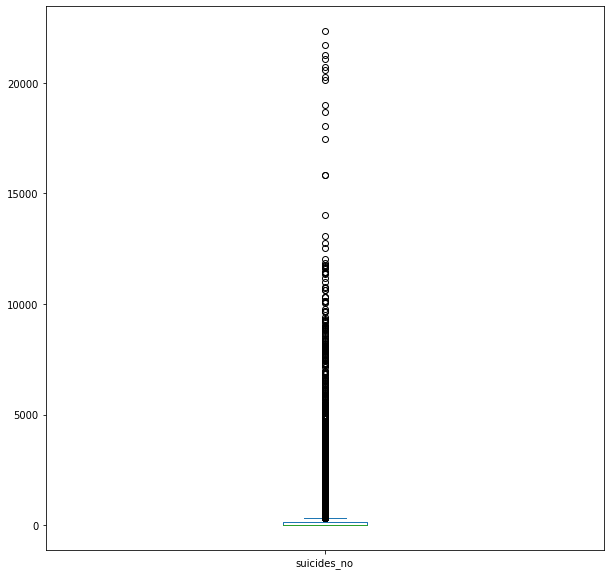

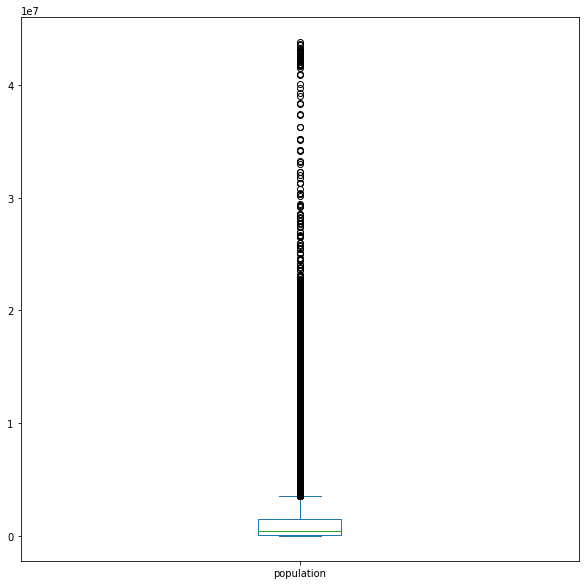

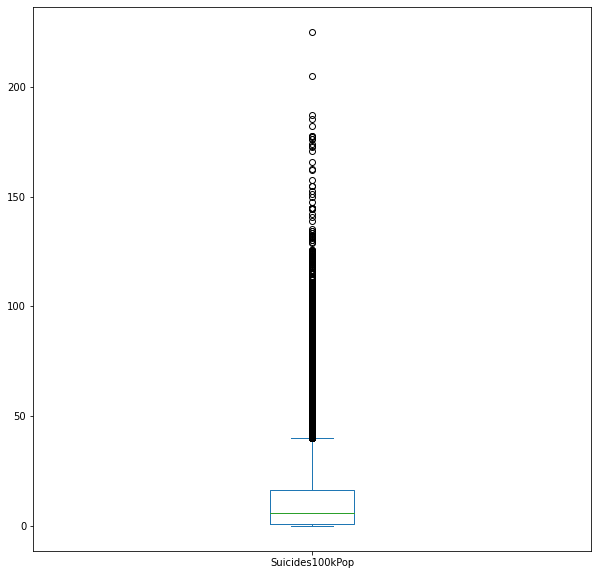

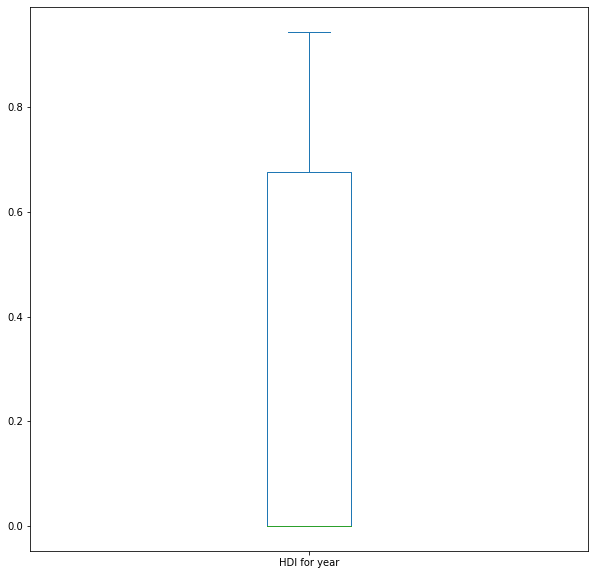

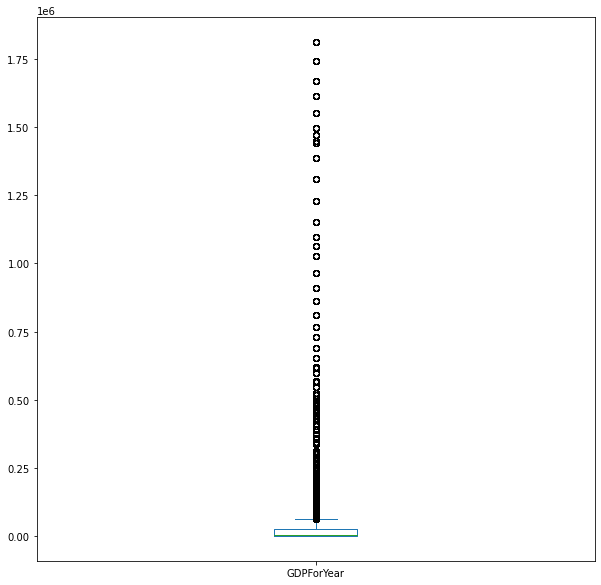

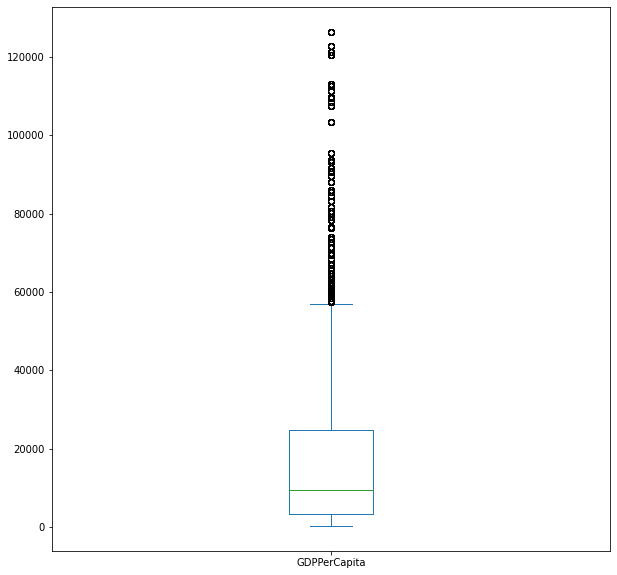

In [ ]:
for vertical_n in data_to_plot.columns.values:#for loop to iterate over multiple cols at once
  if ((data_to_plot[vertical_n].dtypes == 'int64') | (data_to_plot[vertical_n].dtypes == 'float64') & (vertical_n != 'year') ):
    data_to_plot[vertical_n].plot.box(figsize=(10,10))
    plt.show()


## **Q1 c) iii.**

---



With too few bins

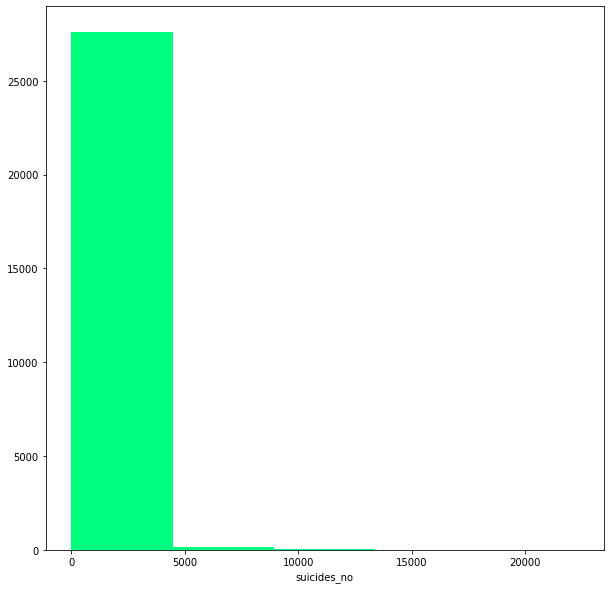

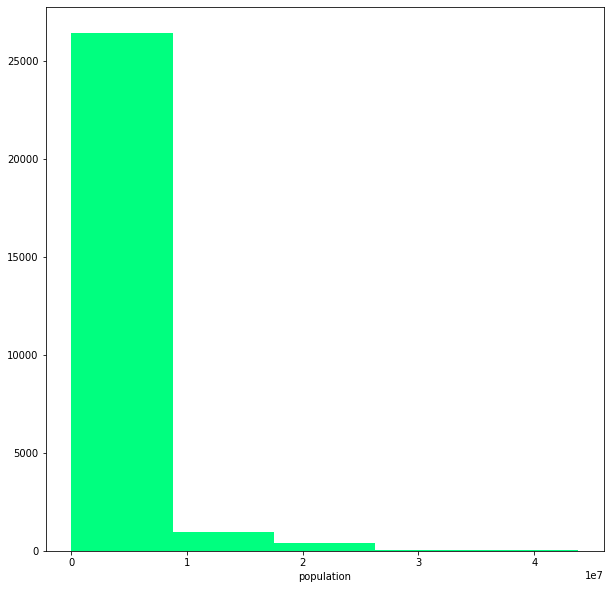

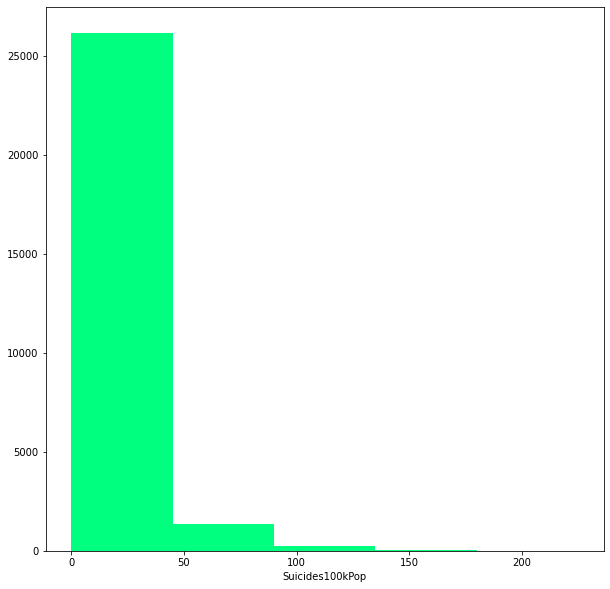

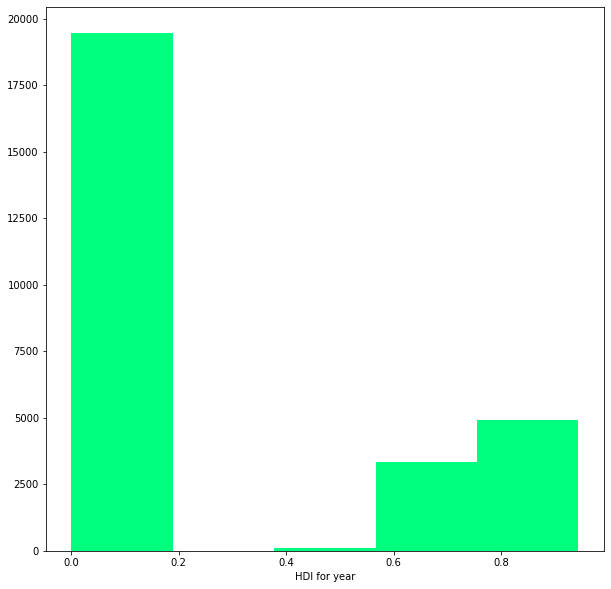

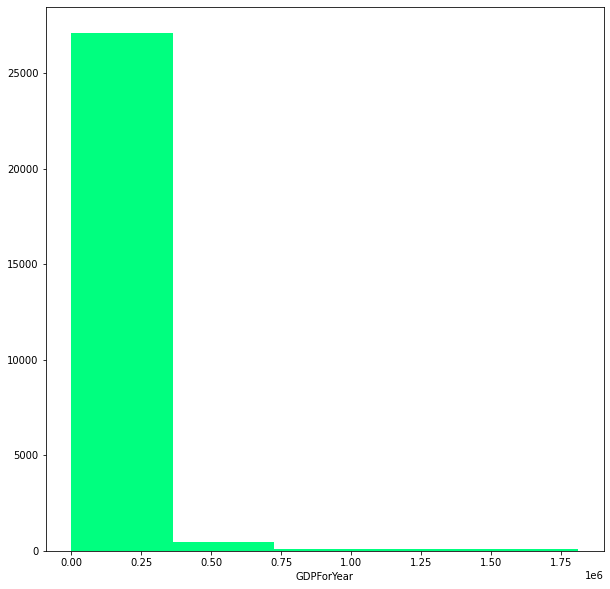

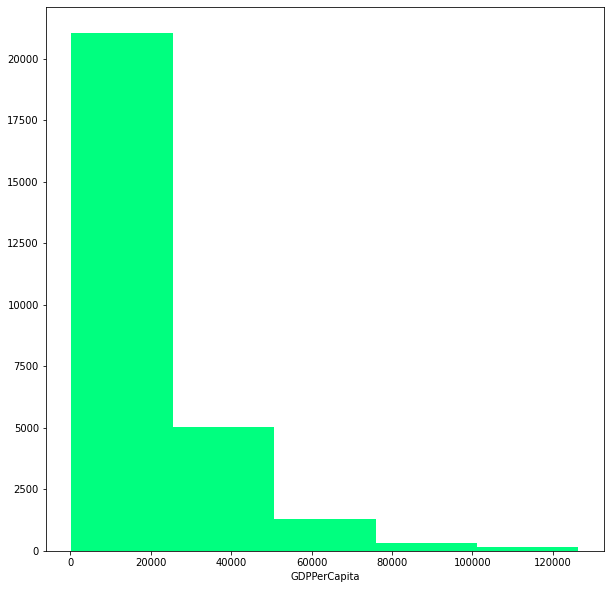

In [ ]:
for vertical_n in data_to_plot.columns.values:
  if (data_to_plot[vertical_n].dtypes == 'int64') | (data_to_plot[vertical_n].dtypes == 'float64') :
    plt.figure(figsize=(10,10))
    plt.hist(data_to_plot[vertical_n],5, color = 'springgreen')#too few
    plt.xlabel(vertical_n)
    plt.show()

With optimal number of bins

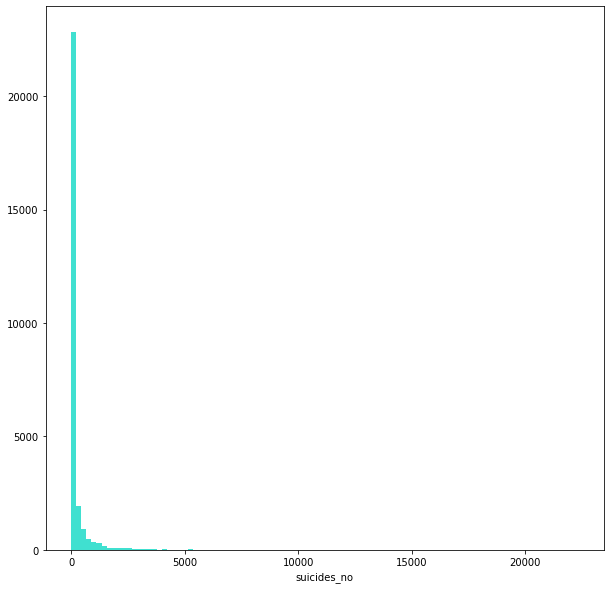

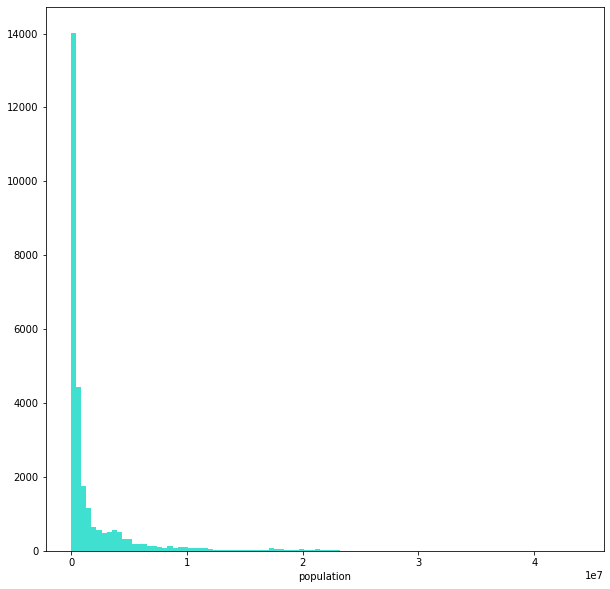

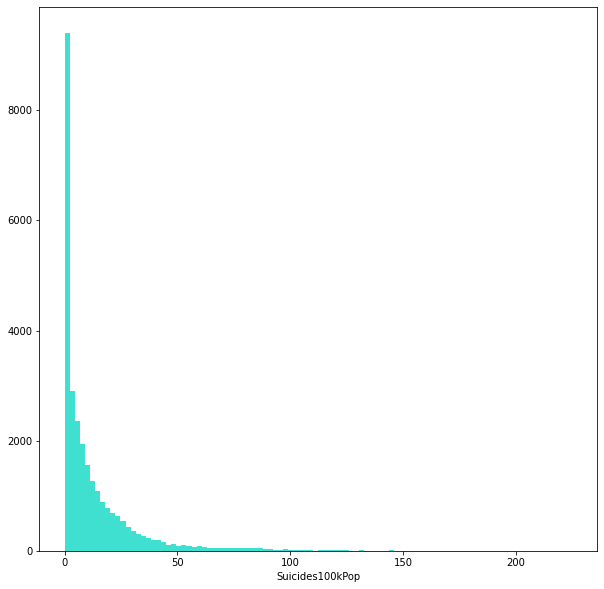

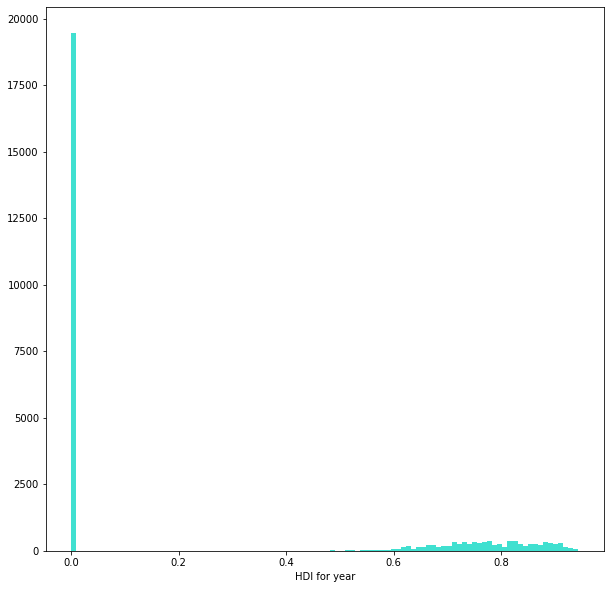

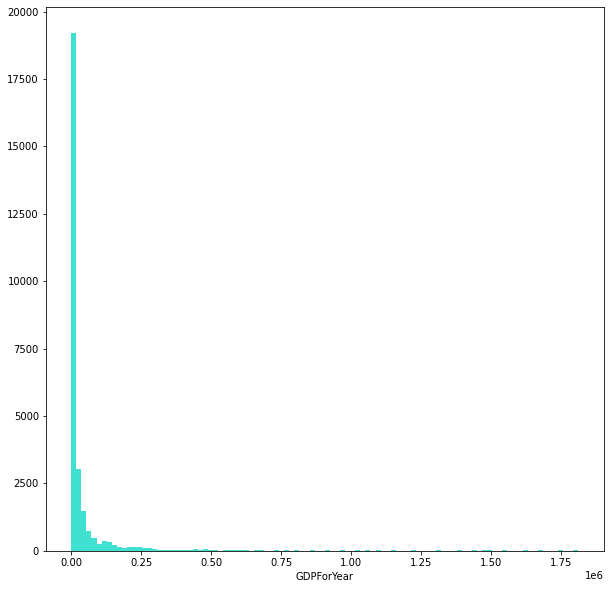

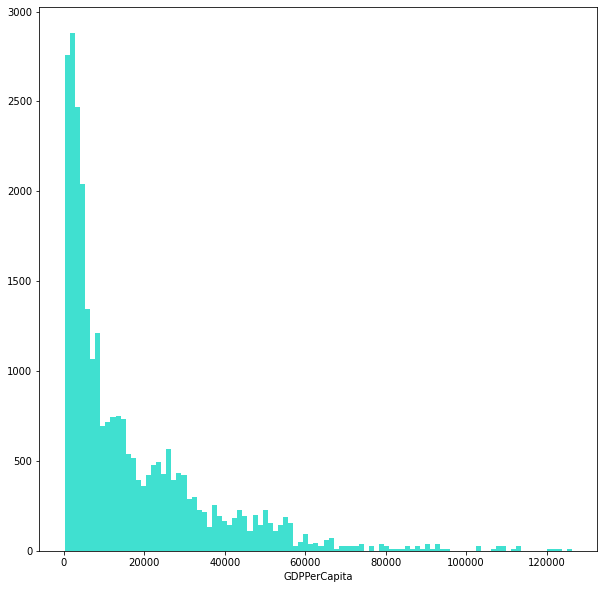

In [ ]:
for vertical_normal_bin in data_to_plot.columns.values: #for loop
  if (data_to_plot[vertical_normal_bin].dtypes == 'int64') | (data_to_plot[vertical_normal_bin].dtypes == 'float64') : #plotting only ints and floats
    plt.figure(figsize=(10,10))
    plt.hist(data_to_plot[vertical_normal_bin], 100, color = 'turquoise') #perfect
    plt.xlabel(vertical_normal_bin)
    plt.show()

With too many bins

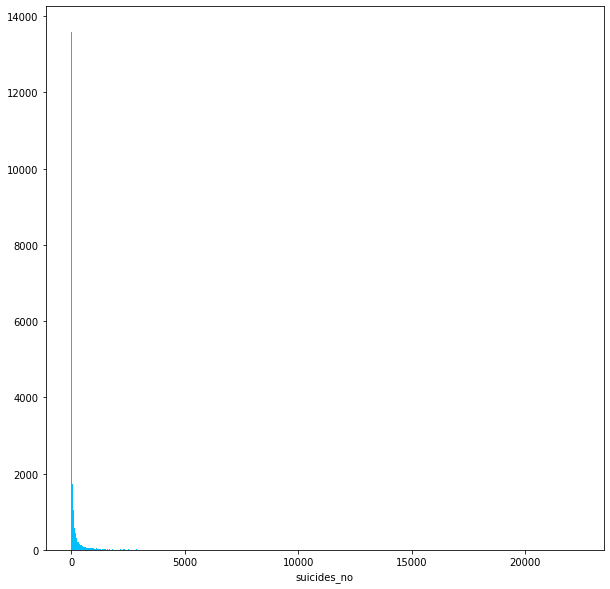

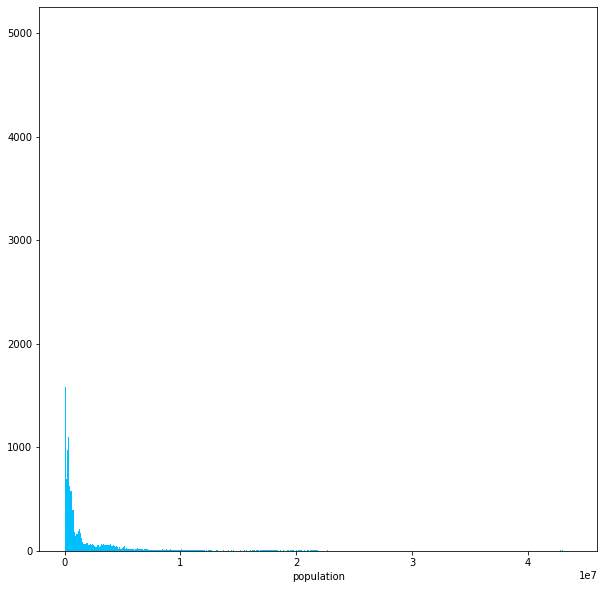

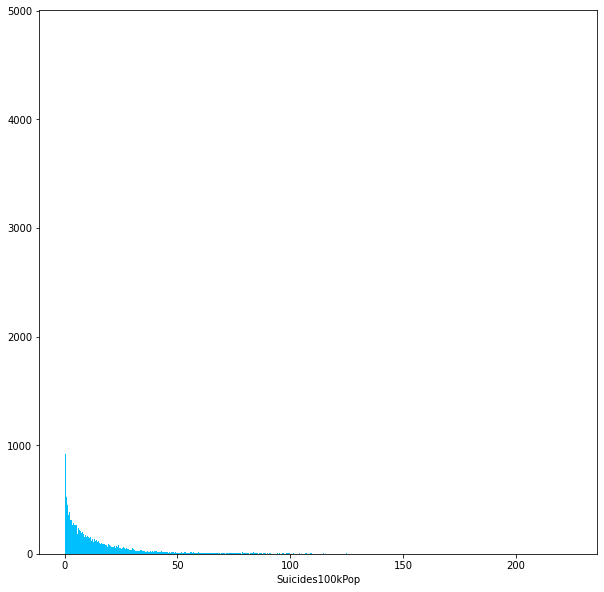

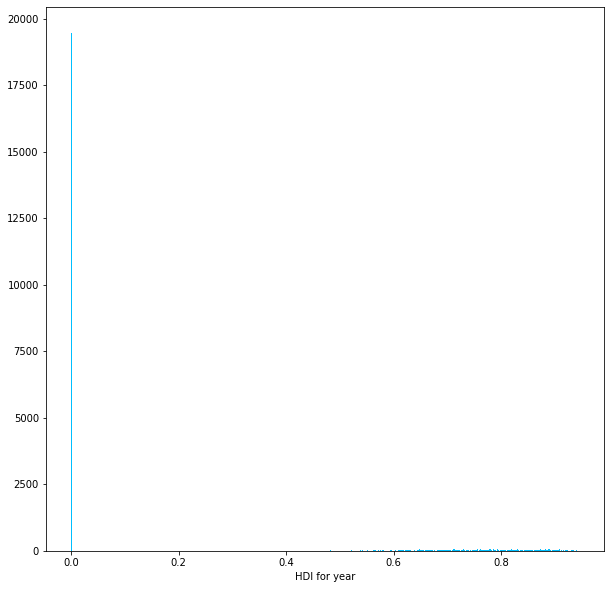

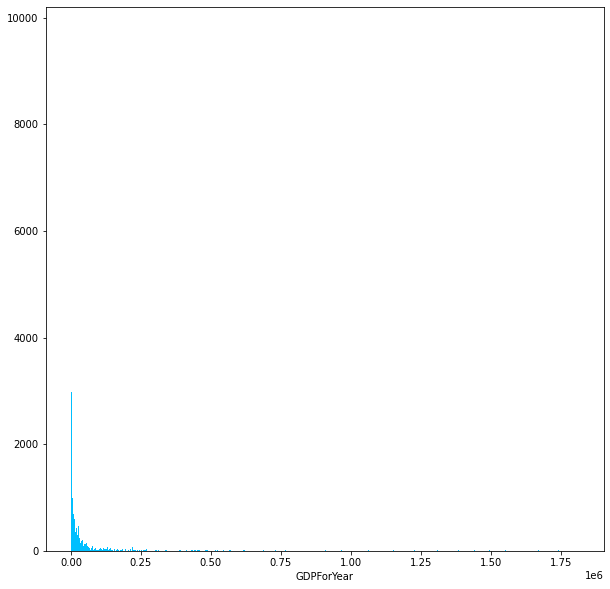

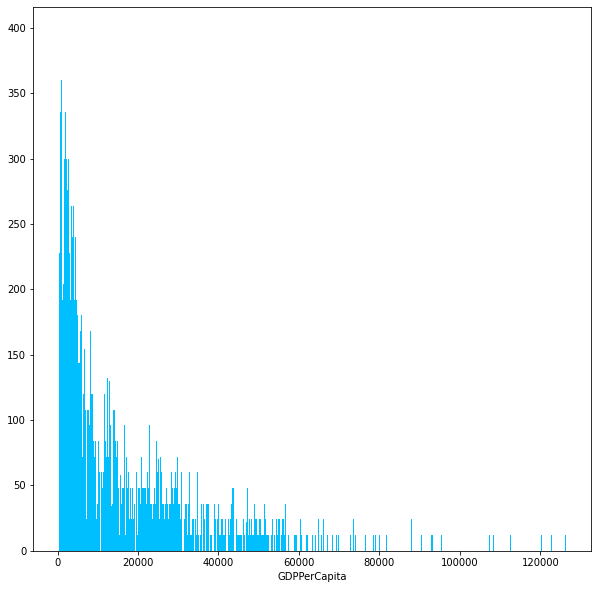

In [ ]:
for vertical_bin in data_to_plot.columns.values: #for loop
  if (data_to_plot[vertical_bin].dtypes == 'int64') | (data_to_plot[vertical_bin].dtypes == 'float64') : #plotting only ints and floats
    plt.figure(figsize=(10,10))
    plt.hist(data_to_plot[vertical_bin], 1000, color = 'deepskyblue') #too many
    plt.xlabel(vertical_bin)
    plt.show()

## **Q1 d) i.**

---



Discrete:Sex
Continuous:Suicides/100k pop

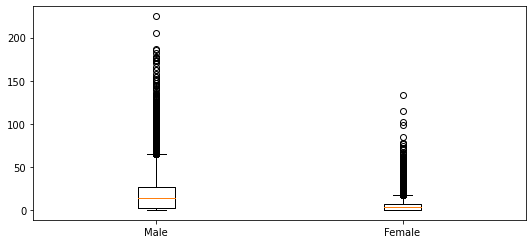

In [ ]:
#sex vs suicides/100kpop

#making filters for discrete variable
filt_male = (data['sex']=='male')
filt_female = (data['sex']=='female')

d_s_vs_sui = [data[filt_male].iloc[:,6],data[filt_female].iloc[:,6]]
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.boxplot(d_s_vs_sui, labels = ['Male', 'Female'])
plt.show()


Discrete:Generation
Continuous:Population

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


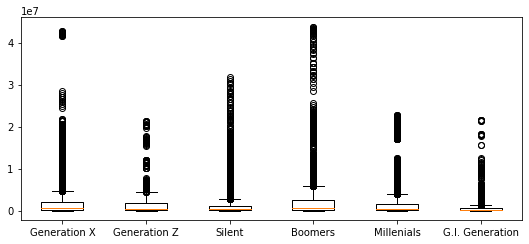

In [ ]:
#generation vs population

#making filters for discrete variable
filt_x = (data['generation']=='Generation X')
filt_z = (data['generation']=='Generation Z')
filt_sil = (data['generation']=='Silent')
filt_boom = (data['generation']=='Boomers')
filt_mil = (data['generation']=='Millenials')
filt_gi = (data['generation']=='G.I. Generation')

df_gen_vs_pop = [data[filt_x].iloc[:,5],data[filt_z].iloc[:,5],data[filt_sil].iloc[:,5],data[filt_boom].iloc[:,5],data[filt_mil].iloc[:,5],data[filt_gi].iloc[:,5]]
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.boxplot(df_gen_vs_pop, labels = ['Generation X','Generation Z','Silent','Boomers','Millenials','G.I. Generation'])
plt.show()

## **Q1 d) ii. Heatmap**

---



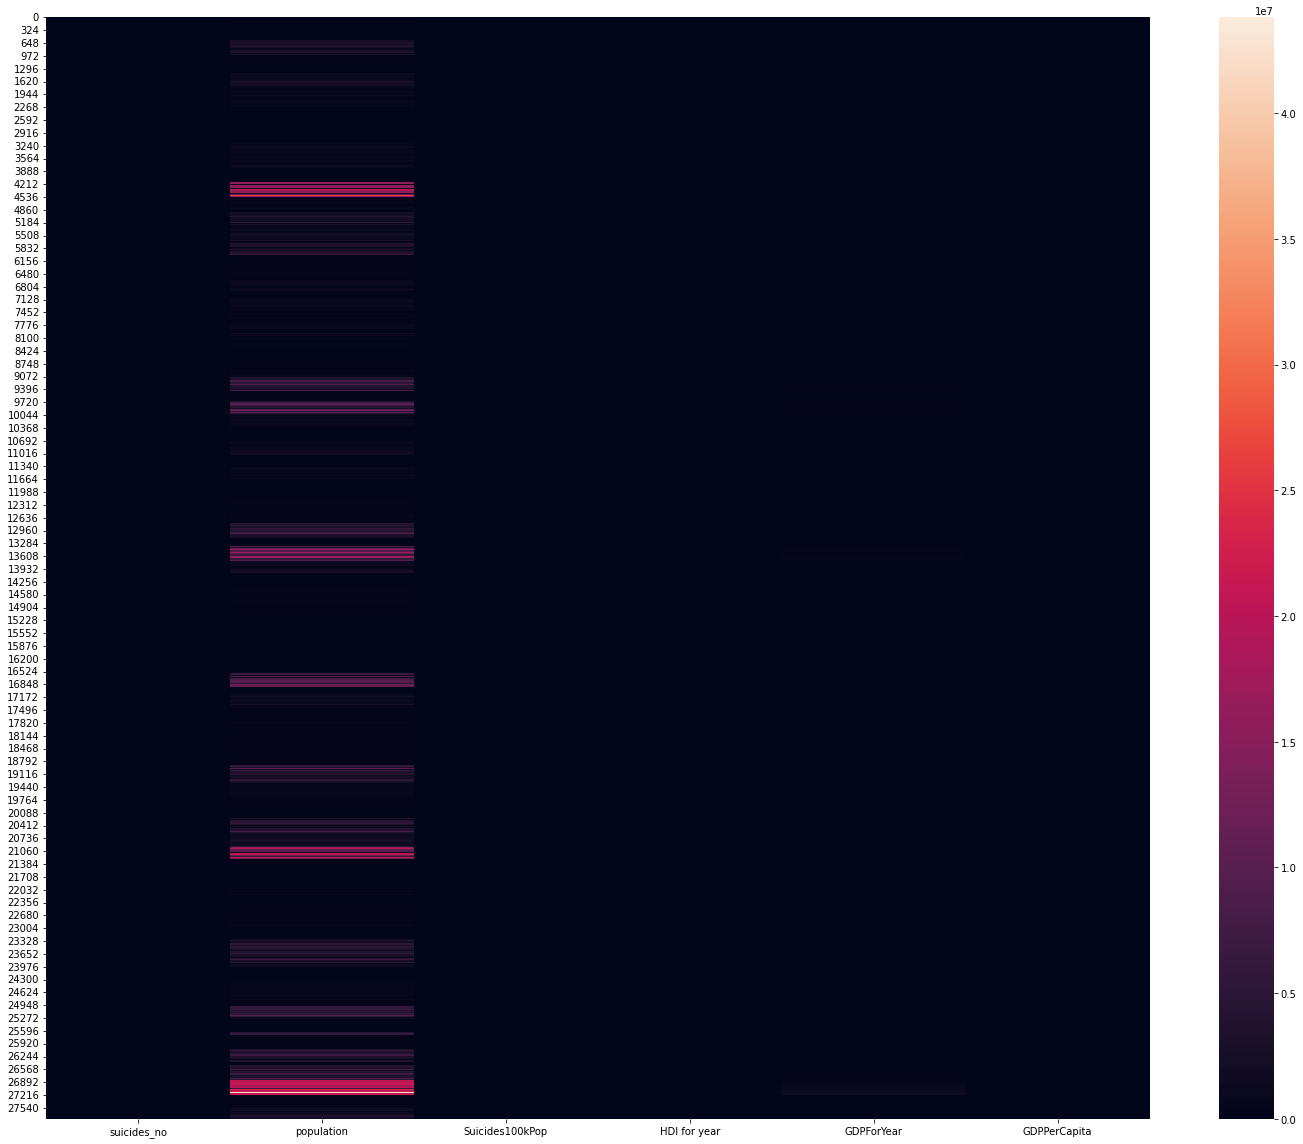

In [ ]:
fig, ax = plt.subplots(figsize=(20,16))
sb.heatmap(data_to_plot)

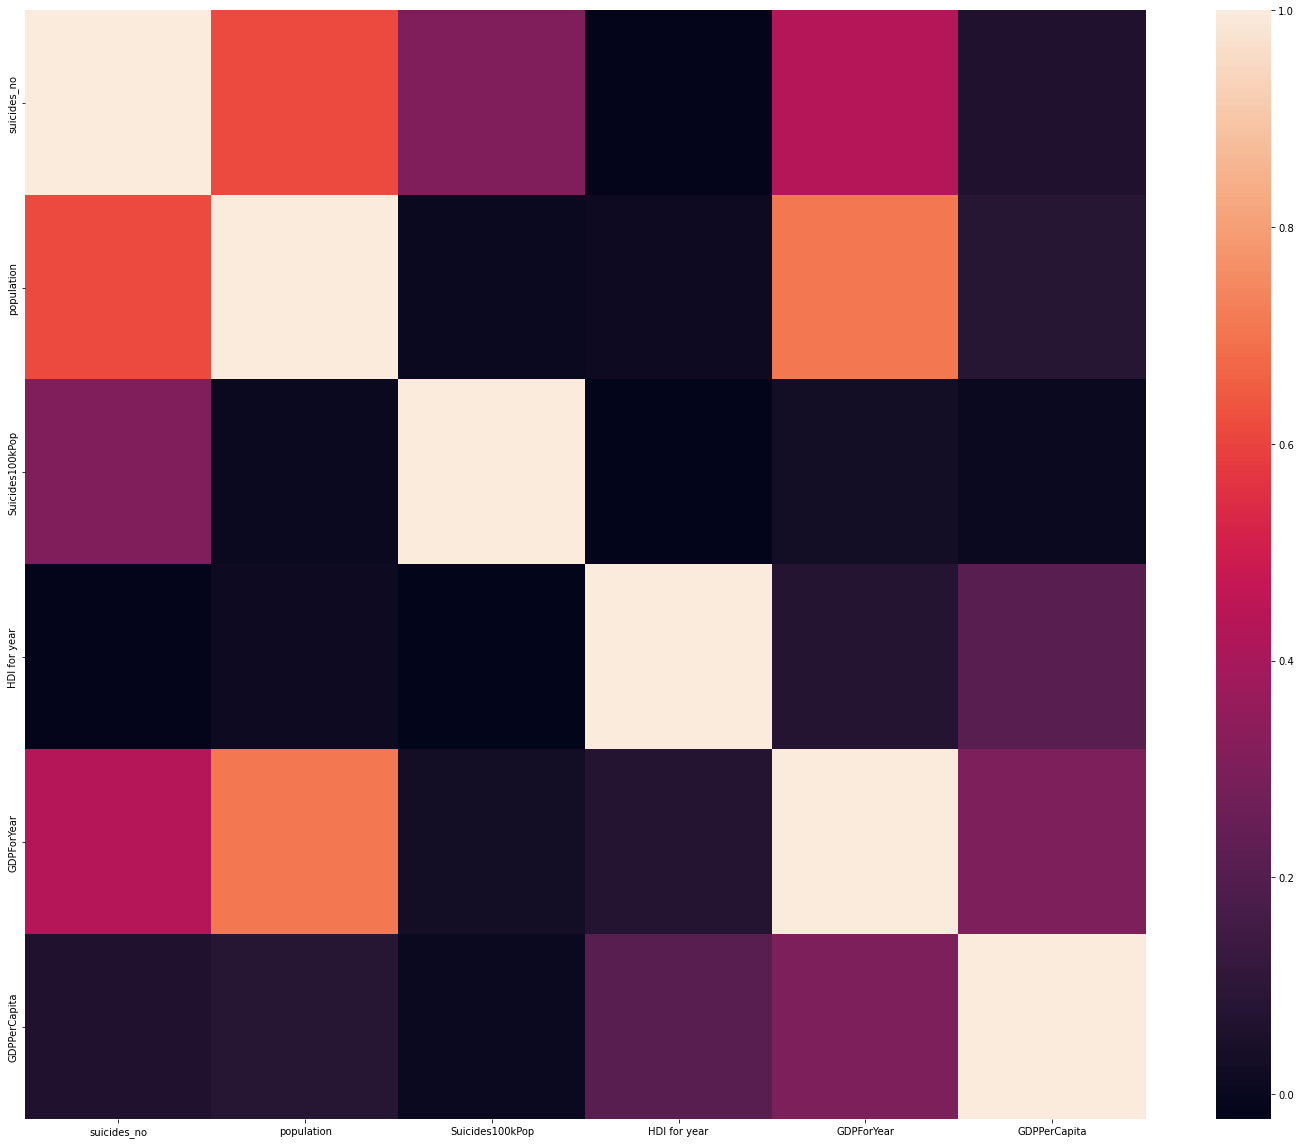

In [ ]:
corr_matrix = data_to_plot.corr(method='pearson')
fig, ax=plt.subplots(figsize=(20,16))
sb.heatmap(corr_matrix, annot = False)
sb.cubehelix_palette(as_cmap = True)
plt.show()

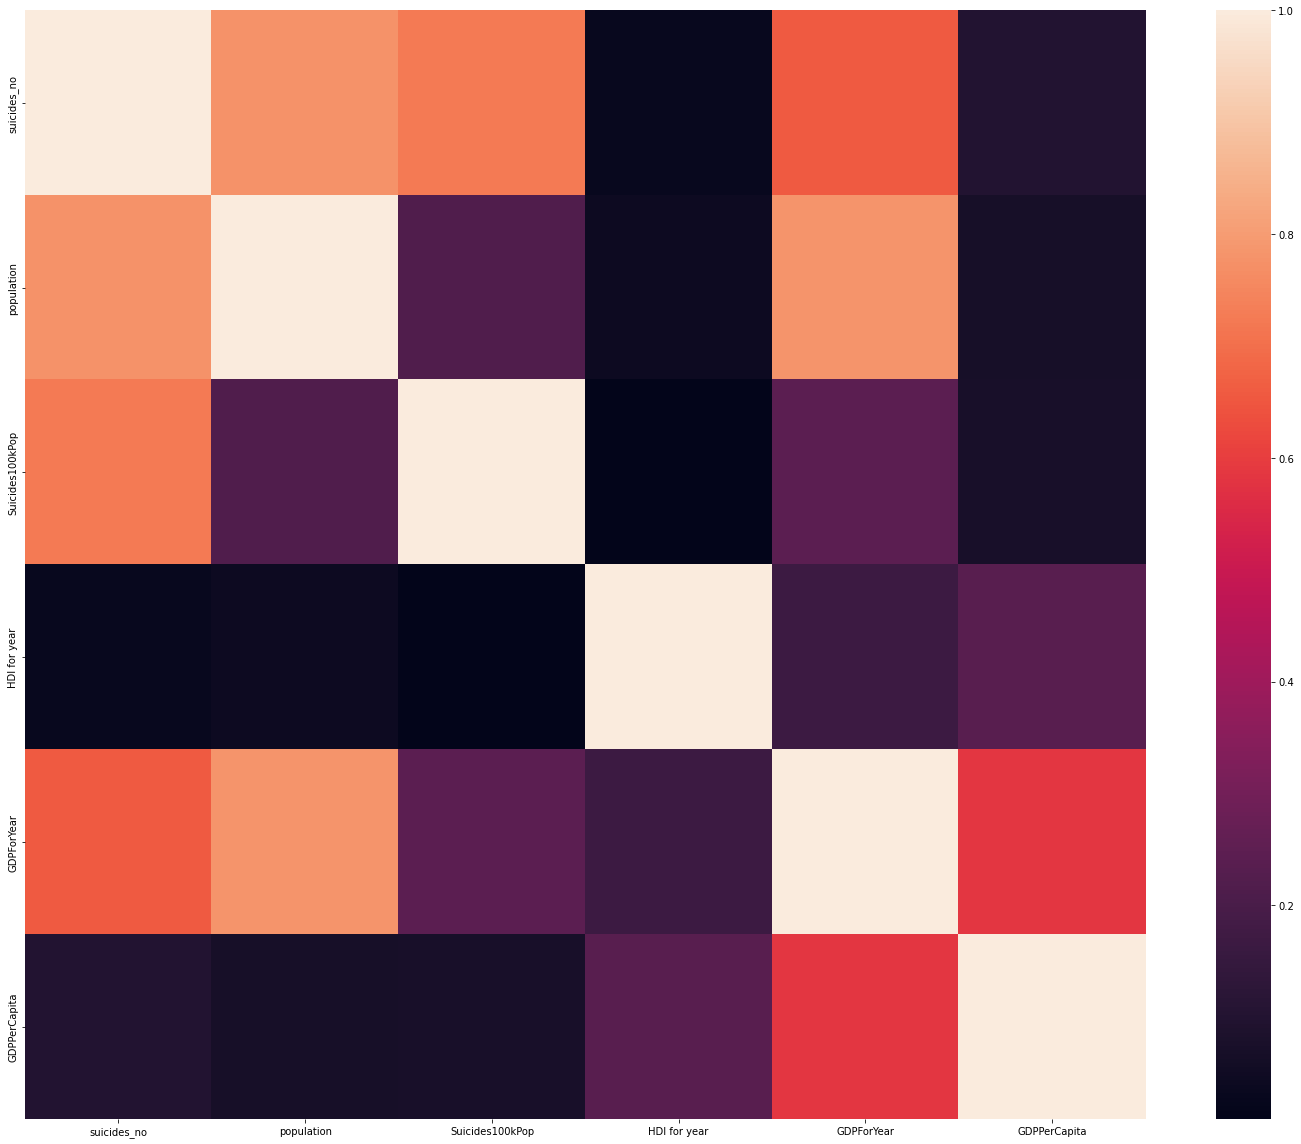

In [ ]:
corr_matrix = data_to_plot.corr(method='spearman')
fig, ax=plt.subplots(figsize=(20,16))
sb.heatmap(corr_matrix, annot = False)
sb.cubehelix_palette(as_cmap = True)
plt.show()

## **Q2 a.**


**Picking top 6 countries by total number of suicides per country**

In [ ]:
df_group = data.groupby(['country','year'])['suicides_no'].sum()

print(df_group)

country     year
Albania     1987      73
            1988      63
            1989      68
            1992      47
            1993      73
                    ... 
Uzbekistan  2010    1464
            2011    1640
            2012    1835
            2013    1950
            2014    2095
Name: suicides_no, Length: 2321, dtype: int64


In [ ]:
test_df = data.groupby(['country','year'])['country'].count()

print(test_df)
#all 12s and some 10s

country     year
Albania     1987    12
            1988    12
            1989    12
            1992    12
            1993    12
                    ..
Uzbekistan  2010    12
            2011    12
            2012    12
            2013    12
            2014    12
Name: country, Length: 2321, dtype: int64


In [ ]:
test_1 = data.groupby(['year','country'])['year'].count()
display(test_1)

year  country            
1985  Antigua and Barbuda    12
      Argentina              12
      Australia              12
      Austria                12
      Bahamas                12
                             ..
2016  Netherlands            10
      Qatar                  10
      Romania                10
      Sweden                 10
      Thailand               10
Name: year, Length: 2321, dtype: int64

## Conclusion:Not all countries have data for 12 years

In [ ]:
df_country = data.groupby(['country'])['suicides_no'].sum()
display(df_country)

country
Albania                    1970
Antigua and Barbuda          11
Argentina                 82219
Armenia                    1905
Aruba                       101
                         ...   
United Arab Emirates        622
United Kingdom           136805
United States           1034013
Uruguay                   13138
Uzbekistan                34803
Name: suicides_no, Length: 101, dtype: int64

In [ ]:
df_cdf = df_country.sort_values(ascending=False)
print(df_cdf)

country
Russian Federation       1209742
United States            1034013
Japan                     806902
France                    329127
Ukraine                   319950
                          ...   
Maldives                      20
Antigua and Barbuda           11
San Marino                     4
Saint Kitts and Nevis          0
Dominica                       0
Name: suicides_no, Length: 101, dtype: int64


In [ ]:
df_cdf.head(6)

country
Russian Federation    1209742
United States         1034013
Japan                  806902
France                 329127
Ukraine                319950
Germany                291262
Name: suicides_no, dtype: int64

**Picking top 6 countries by average no of suicides per country**

In [ ]:
df_by_avg = data.groupby(['country'])['suicides_no'].mean()
df_sort_avg = df_by_avg.sort_values(ascending=False)
top_6 = df_sort_avg.head(6)
display(top_6)

country
Russian Federation    3733.771605
United States         2779.604839
Japan                 2169.091398
Ukraine                952.232143
Germany                933.532051
France                 914.241667
Name: suicides_no, dtype: float64

*Very clearly the order changes depending on the method used* 

# **We shall proceed with the average analysis**

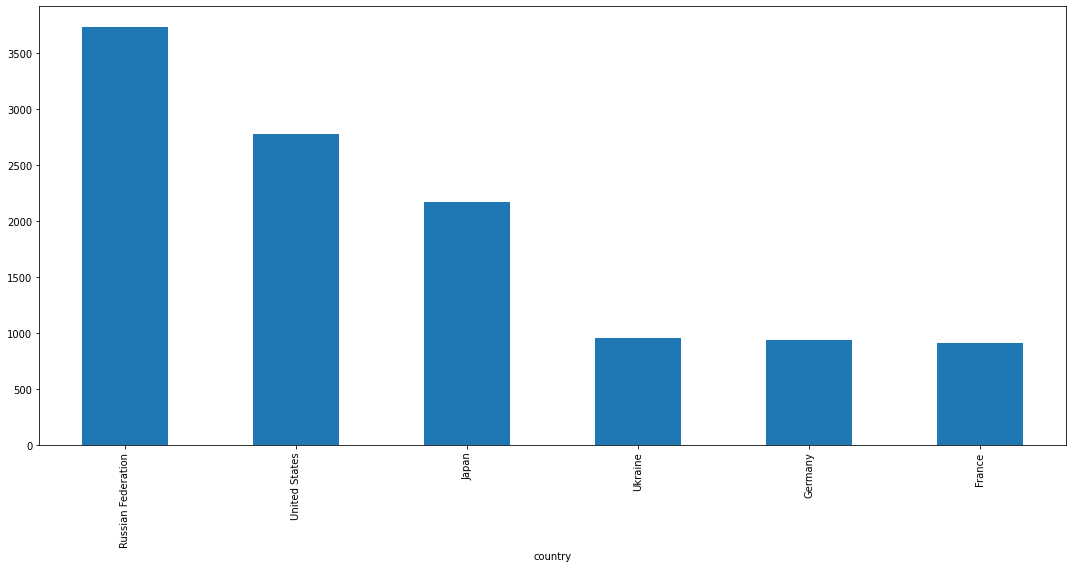

In [ ]:
top_6.plot.bar(figsize=(15,8))

In [ ]:
list_top_6=top_6.index.tolist()
print(list_top_6)

['Russian Federation', 'United States', 'Japan', 'Ukraine', 'Germany', 'France']


## Displaying suicides for each country for each year 

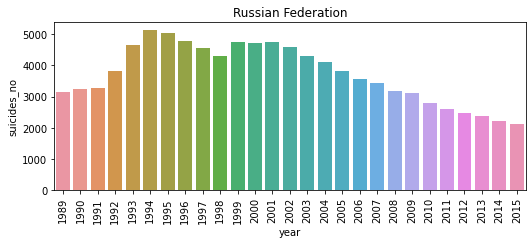

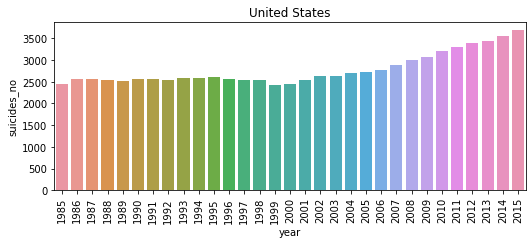

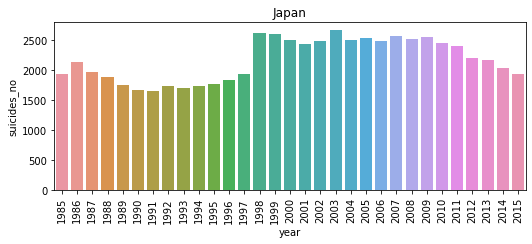

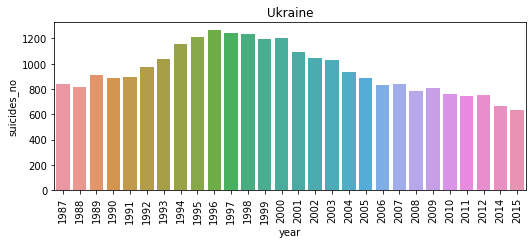

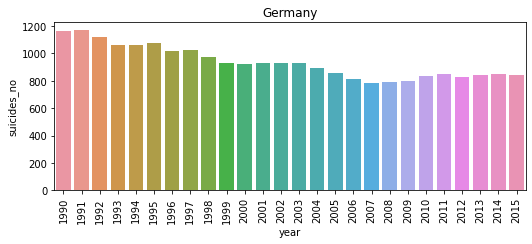

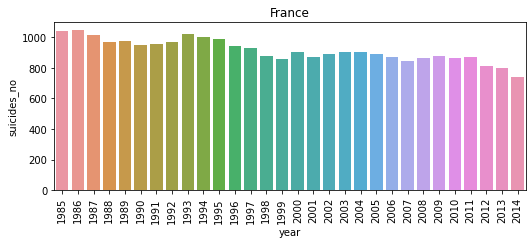

In [ ]:
for country in list_top_6:
    a=data.groupby(['country']).get_group(country)
    sb.barplot(x=a["year"],y=a["suicides_no"],ci=None)
    plt.xticks(rotation=90)
    plt.title(country)
    plt.show()

In [ ]:
#printing the same values in a tabular format
filter = ((data.country=='Russian Federation') | (data.country=='United States') | (data.country=='Japan') | (data.country=='France') |
(data.country=='Ukraine') | (data.country=='Germany') )
rv = data.loc[filter].groupby(['country','year'])['suicides_no'].sum()

#in alphabetical order
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
  print(rv)

country             year
France              1985    12501
                    1986    12529
                    1987    12161
                    1988    11599
                    1989    11715
                    1990    11403
                    1991    11502
                    1992    11644
                    1993    12251
                    1994    12041
                    1995    11819
                    1996    11279
                    1997    11139
                    1998    10534
                    1999    10268
                    2000    10849
                    2001    10449
                    2002    10643
                    2003    10871
                    2004    10804
                    2005    10713
                    2006    10423
                    2007    10127
                    2008    10353
                    2009    10499
                    2010    10379
                    2011    10408
                    2012     9743
                    201

## **Q2 b.**

---

Comparing mix of age groups across countries

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


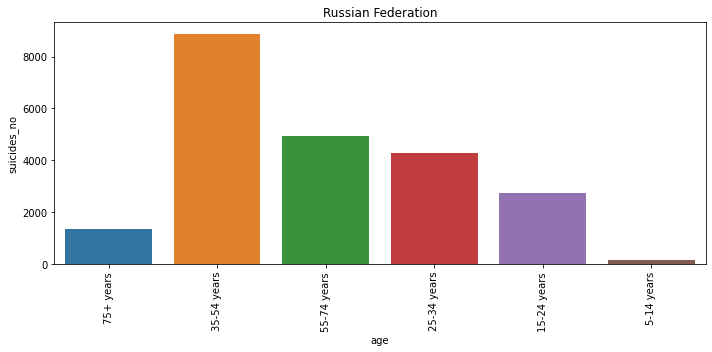

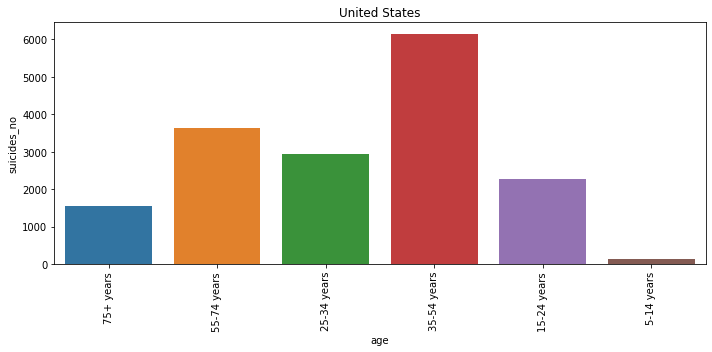

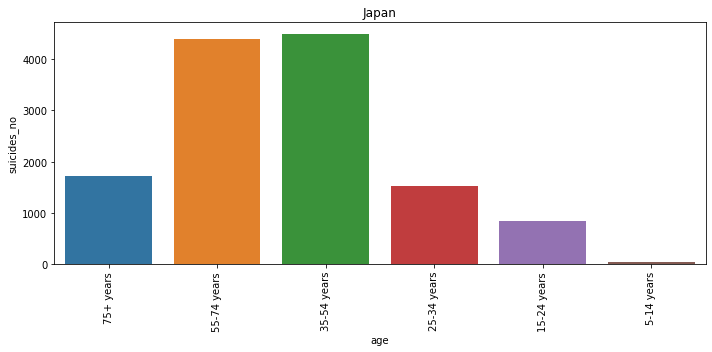

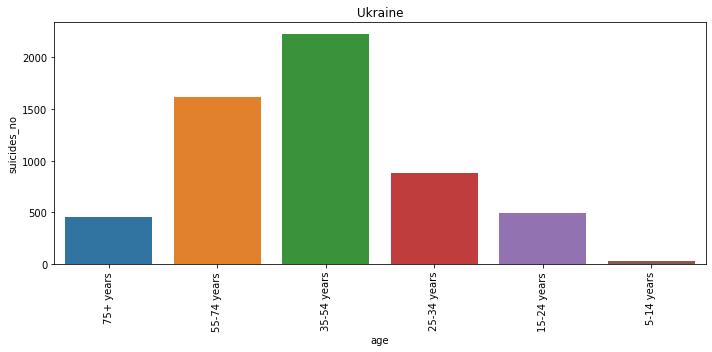

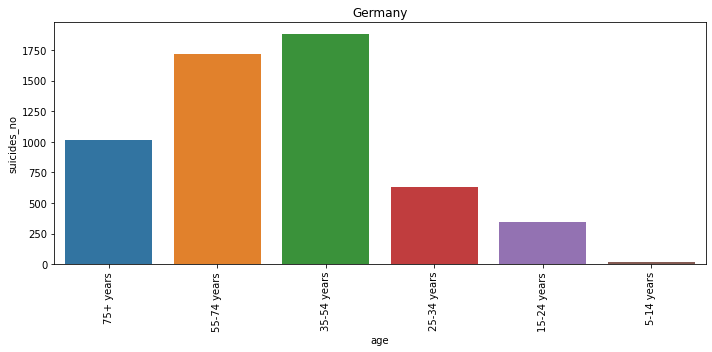

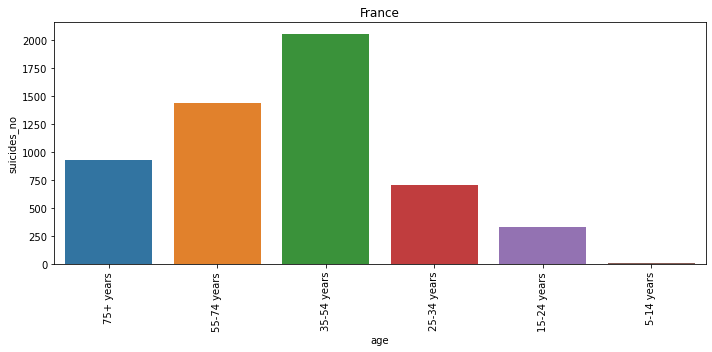

In [ ]:
a.sort_values("age",ascending=True,inplace=True)
for country in list_top_6:
    a=data.groupby(['country']).get_group(country)
    plt.figure(figsize=(10,5))
    sb.barplot(x=a["age"],y=a["suicides_no"],ci=None)  #ci=None drops the uncertainity bar
    plt.xticks(rotation=90)
    plt.title(country)
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


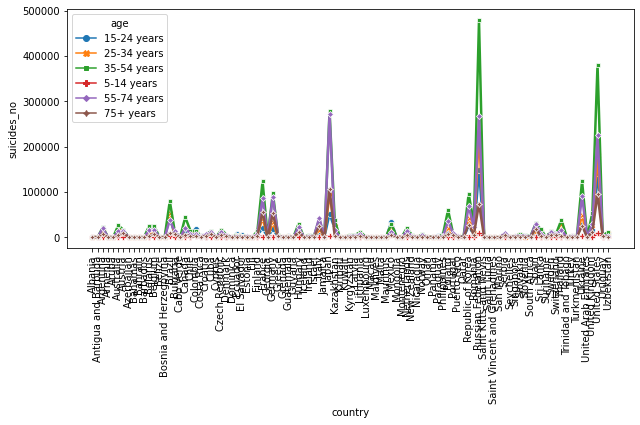

In [ ]:
df_age = data.groupby(["country","age"])["suicides_no"].sum()
df_reset = df_age.copy().reset_index()

plt.figure(figsize=(9,6))
sb.lineplot("country", df_reset.suicides_no, hue = "age",
             data = df_reset, linewidth = 2.5, style = "age", markers=True
            , dashes=False)
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


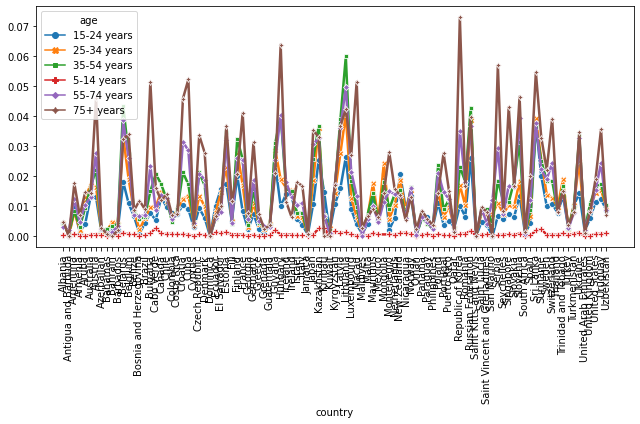

In [ ]:
#percentage of suicides calculated against respective populations
df_age = data.groupby(["country","age"])["suicides_no", "population"].sum()
df_reset = df_age.copy().reset_index()

plt.figure(figsize=(9,6))
sb.lineplot("country", df_reset.suicides_no*100/df_reset.population, hue = "age",
             data = df_reset, linewidth = 2.5, style = "age", markers=True
            , dashes=False)
plt.xticks(rotation = 90)
plt.show()

## Conclusion: The age group 35-54 has highest suicides in every country

## **Q2 C**

---



In [ ]:
df_sex = data.groupby(['country','sex'])['suicides_no'].sum()
print(df_sex)

country              sex   
Albania              female       693
                     male        1277
Antigua and Barbuda  female         1
                     male          10
Argentina            female     18326
                                ...  
United States        male      820216
Uruguay              female      2820
                     male       10318
Uzbekistan           female      9260
                     male       25543
Name: suicides_no, Length: 202, dtype: int64


sex,female,male
country,,
France,89419,239708
Germany,79707,211555
Japan,251630,555272
Russian Federation,214330,995412
Ukraine,61377,258573
United States,213797,820216


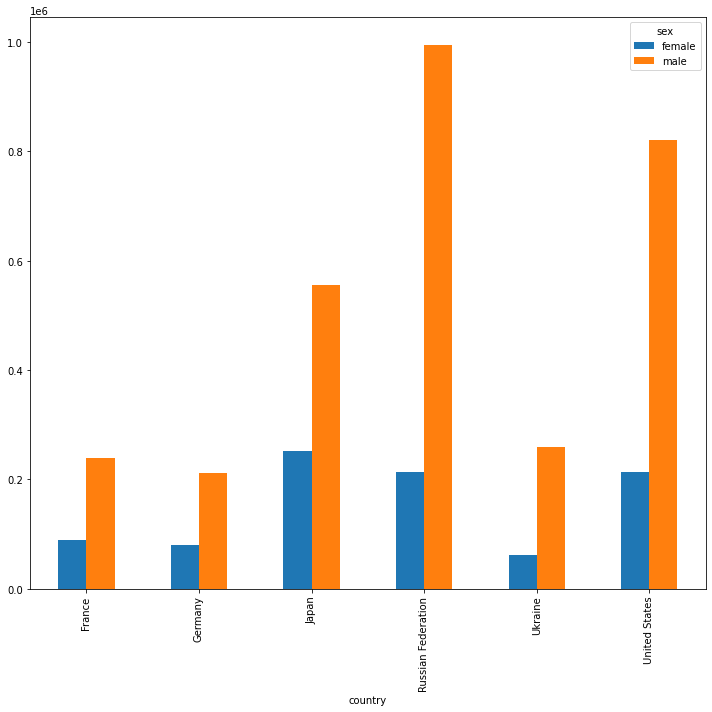

In [ ]:
filter = ((data.country=='Russian Federation') | (data.country=='United States') | (data.country=='Japan') | (data.country=='Ukraine') |
(data.country=='Germany') | (data.country=='France') )
df_sex = data.loc[filter].groupby(['country','sex'])['suicides_no'].sum().unstack(fill_value=0)
display(df_sex)
df_sex.plot.bar(figsize=(10,10))
#in alphabetical order

## Conclusion: Clearly, males suicide more than females

## **Q2 d.**

---



age                 15-24 years  25-34 years  35-54 years  5-14 years  \
country       year                                                      
United States 1985         5121         6376         8158         278   
              1986         5120         6711         8749         255   
              1987         4924         6655         8839         251   
              1988         4929         6710         8737         243   
              1989         4870         6565         8973         240   
              1990         4869         6550         9435         264   
              1991         4751         6514         9750         266   
              1992         4693         6172        10027         314   
              1993         4849         6307        10338         321   
              1994         4956         6354        10671         322   
              1995         4784         6292        10999         337   
              1996         4358         5861        11578         302   
              1997         4186         5672        11678         307   
              1998         4135         5365        11968         324   
              1999         3901         5106        11547         244   
              2000         3994         4792        11999         307   
              2001         3971         5070        12577         279   
              2002         4010         5046        13159         264   
              2003         3988         5065        13083         250   
              2004         4316         5074        13544         285   
              2005         4212         4990        13541         272   
              2006         4189         4985        14017         219   
              2007         4140         5278        14503         184   
              2008         4298         5300        14990         222   
              2009         4371         5320        15277         265   
              2010         4602         5737        15371         274   
              2011         4822         6100        15457         287   
              2012         4872         6216        15620         311   
              2013         4878         6348        15172         395   
              2014         5079         6569        15473         428   
              2015         5491         6947        15687         413   

age                 55-74 years  75+ years  
country       year                          
United States 1985         6870       2643  
              1986         7196       2861  
              1987         7078       3036  
              1988         6702       3067  
              1989         6617       2953  
              1990         6613       3164  
              1991         6325       3184  
              1992         6143       3122  
              1993         6101       3168  
              1994         5677       3143  
              1995         5764       3096  
              1996         5731       3049  
              1997         5609       3065  
              1998         5560       3206  
              1999         5367       3018  
              2000         5237       3014  
              2001         5749       2961  
              2002         6081       3085  
              2003         6178       2913  
              2004         6290       2919  
              2005         6554       3060  
              2006         6967       2915  
              2007         7514       2977  
              2008         8261       2959  
              2009         8726       2941  
              2010         9358       3020  
              2011         9700       3142  
              2012        10296       3281  
              2013        10929       3421  
              2014        11637       3583  
              2015        11940       3711

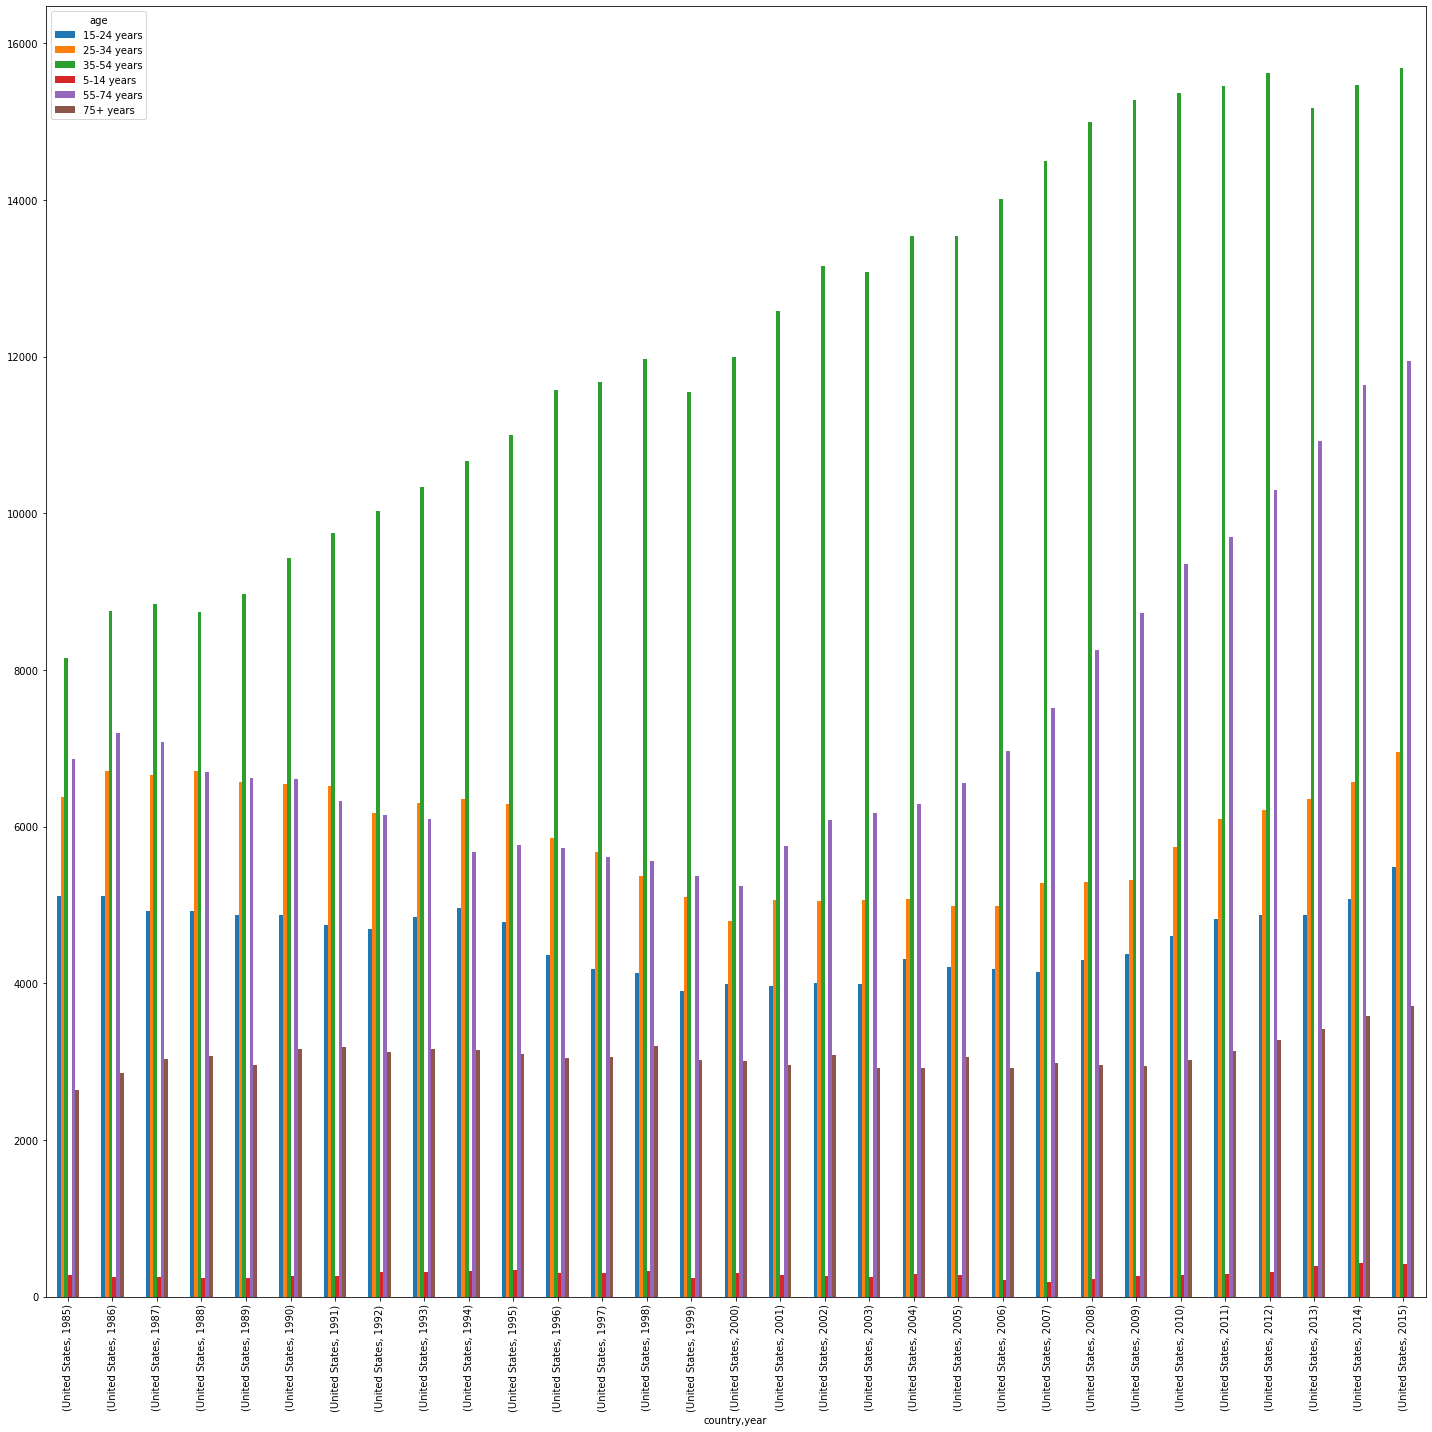

In [ ]:
filter_usa = ((data.country=='United States'))
df_year = data.loc[filter_usa].groupby(['country','year','age'])['suicides_no'].sum().unstack(fill_value=0)
display(df_year)
df_year.plot.bar(figsize=(20,20))
#in alphabetical order

## Conclusion:

For 35-54 2012 was worst

For 55-75 and 25-34 and 75+ 2015 was worst

For 35-54 2012 was worst

For 5-14 2013 was worst

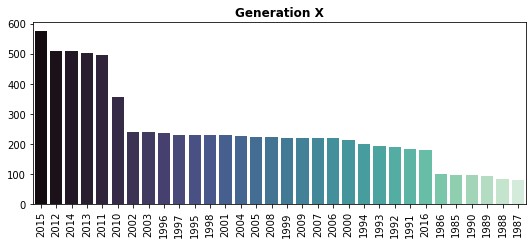

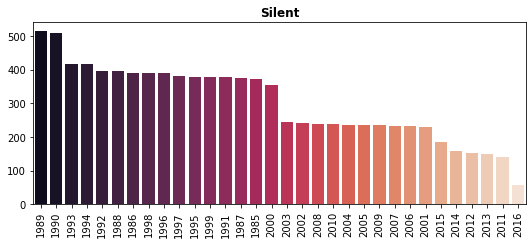

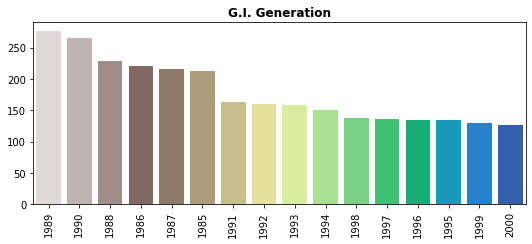

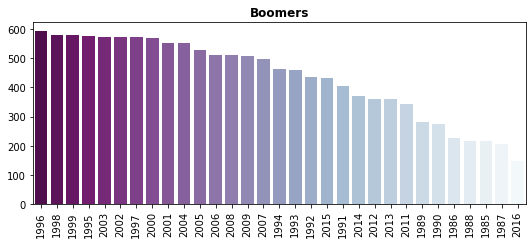

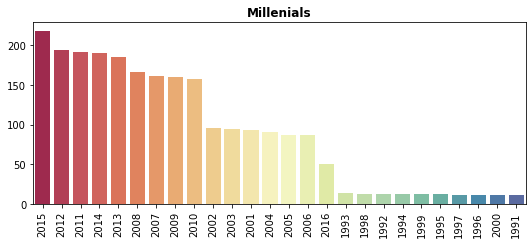

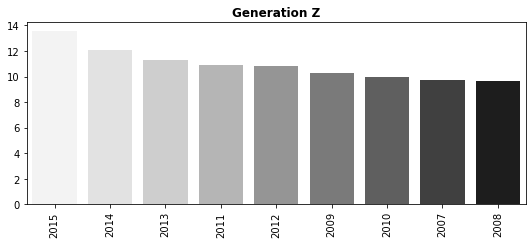

In [ ]:
filtered_df = data[["generation", "year", "suicides_no"]]

df_to_use = filtered_df.copy()
df_to_use.columns = ['generation', 'year', 'suicides_no']


# converting to a compatible pivot table
df_to_use = df_to_use.pivot_table(index='year', columns='generation', values='suicides_no')

# ensuring that there are no null values
df_to_use = df_to_use.fillna(0)


# choosing color palette for each graph
palette_list = ["mako","rocket","terrain_r","BuPu_r","Spectral","Greys"]

# providing headings
cols_txt = list(filtered_df['generation'].unique())

#iterating over a for loop
for i in range(6):
    plt.xticks(rotation=90)
    rand_1 = df_to_use[cols_txt[i]].copy()
    rand_1 = rand_1.reset_index()
    rand_1.columns=['Year','Suicides']
    rand_1 = rand_1[rand_1>0]
    rand_1 = rand_1.dropna()

    # sorting in order
    rand_1 = rand_1.sort_values('Suicides',ascending=False).reset_index(drop=True)
    ax = sb.barplot(x='Year',y='Suicides',data=rand_1,order = rand_1['Year'],palette=palette_list[i])

    # removing labels
    ax.set(xlabel='',ylabel='')
    plt.title(cols_txt[i],weight='bold')
    plt.show()

## **Q 2 e.**

---



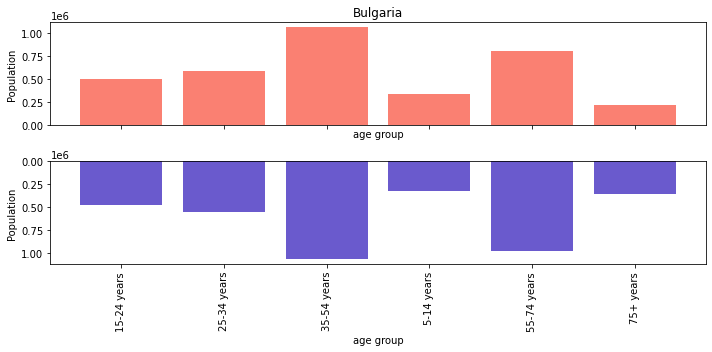

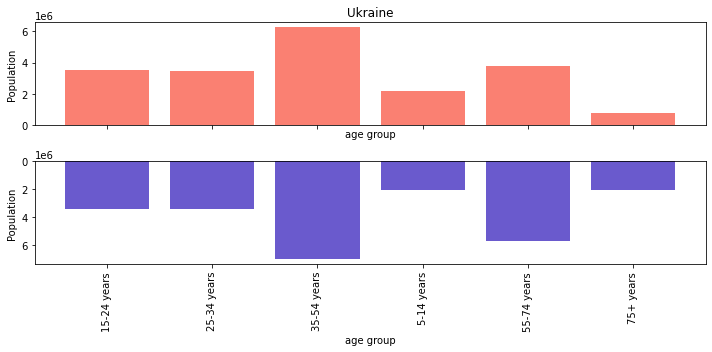

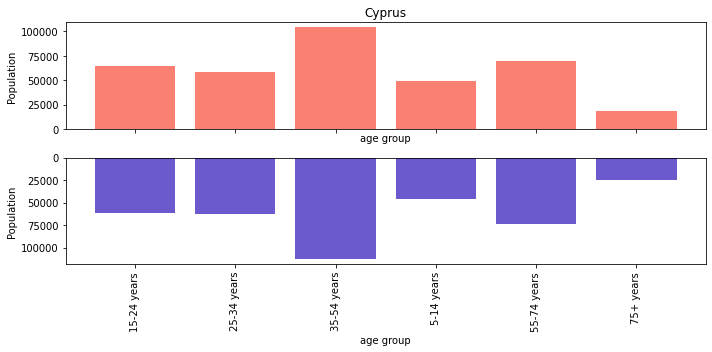

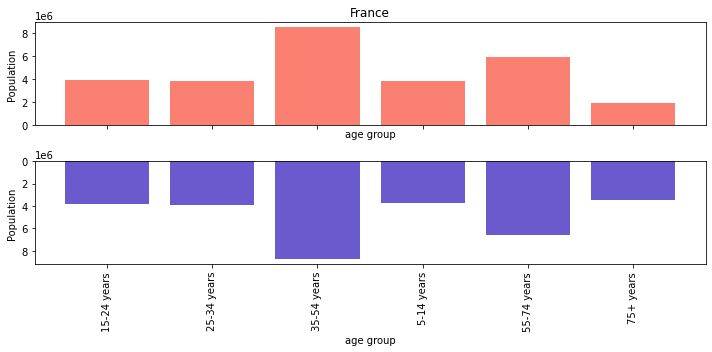

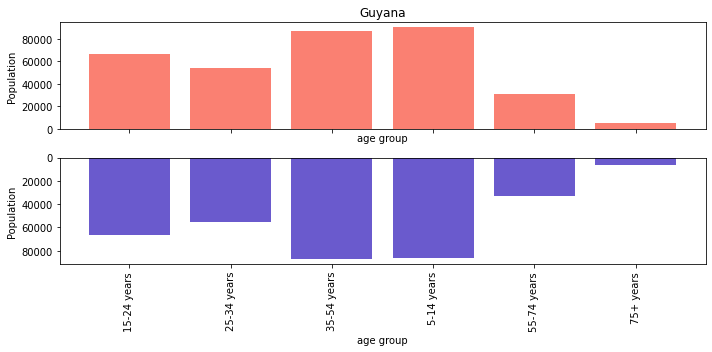

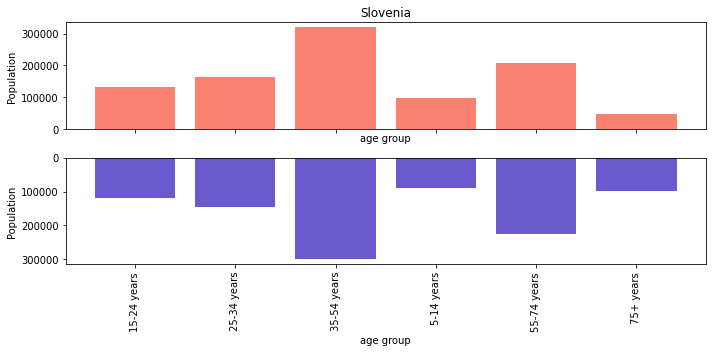

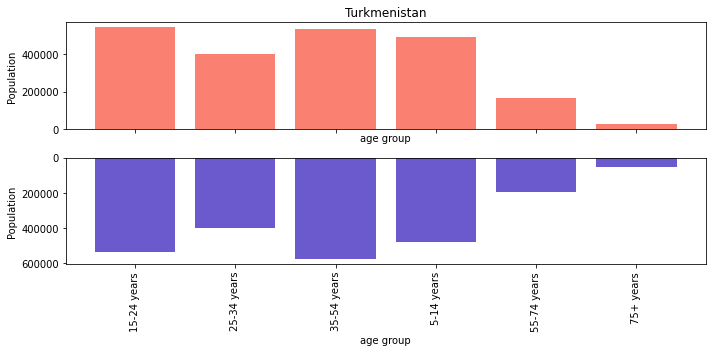

In [ ]:
df_for = data.groupby(['year','country','sex','age']).sum()

# finding indices using .xs method
df_index = df_for.xs(2008,level='year')


# converting multiindex to normal index
df_index = df_index.reset_index()

# selecting some listofcountries randomly for visualization
listofcountries = ['Bulgaria','Ukraine','Cyprus','France','Guyana','Slovenia','Turkmenistan']

for country in listofcountries:

    #selecting one at a time
    df_select = df_index.loc[df_index['country']==country]

    #Selecting population and age columns of male and female data
    df_male = df_select.loc[df_select['sex']=='male'][['population','age']]
    df_female = df_select.loc[df_select['sex']=='female'][['population','age']]

    # merging male female data by age data to plot by age
    df_merge = pd.merge(df_male, df_female, on='age')
    df_male.reset_index(drop=True,inplace=True)
    df_female.reset_index(drop=True,inplace=True)
    df_merge = df_merge[['age','population_x','population_y']]


    # For bihist plot creating subplot with 2 rows and 1 column
    fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10,5))

    # selecting an axis, clor and data for each plot
    for ax, column, color, invert in zip(axes.ravel(), ['population_x','population_y'], ['salmon', 'slateblue'],  [False,True]):
        ax.bar(df_merge['age'],df_merge[column],  color=color)
        plt.xticks(rotation=90)
        ax.set(xlabel='age group',ylabel='Population')
        # inverting
        if invert:
            ax.invert_yaxis()
        # alternatively plotting title as we need one title for bihist
        else :
            ax.set_title(country)

## **Q2 f.**

---



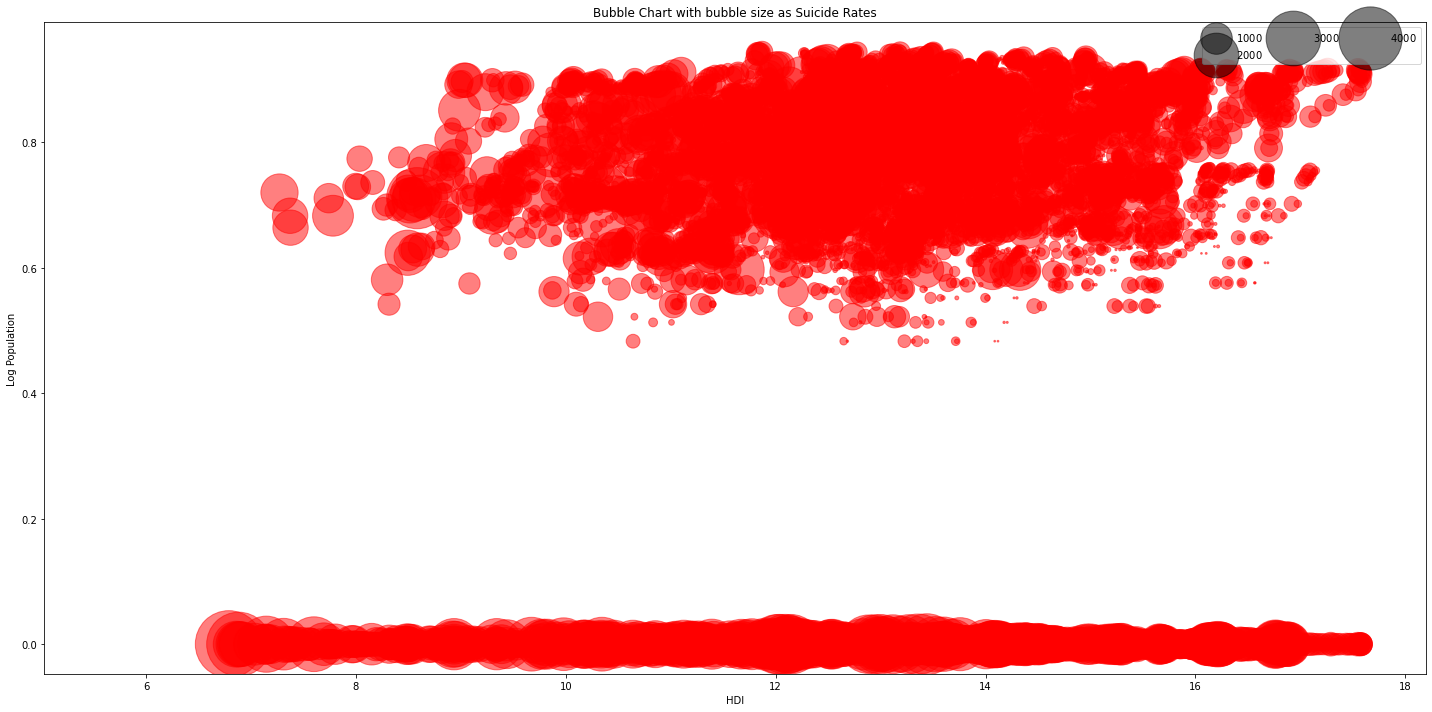

In [ ]:
y=data["HDI for year"]
x=np.log(data["population"])
z=data['Suicides100kPop']
plt.figure(figsize=(20,10))
ax = plt.scatter(x,y,s = z*20, c="red",alpha=0.5)
plt.legend(*ax.legend_elements("sizes", num=5),ncol=3, frameon=True,handletextpad=1)
plt.xlabel('HDI')
plt.ylabel('Log Population')
plt.title('Bubble Chart with bubble size as Suicide Rates')
plt.show()

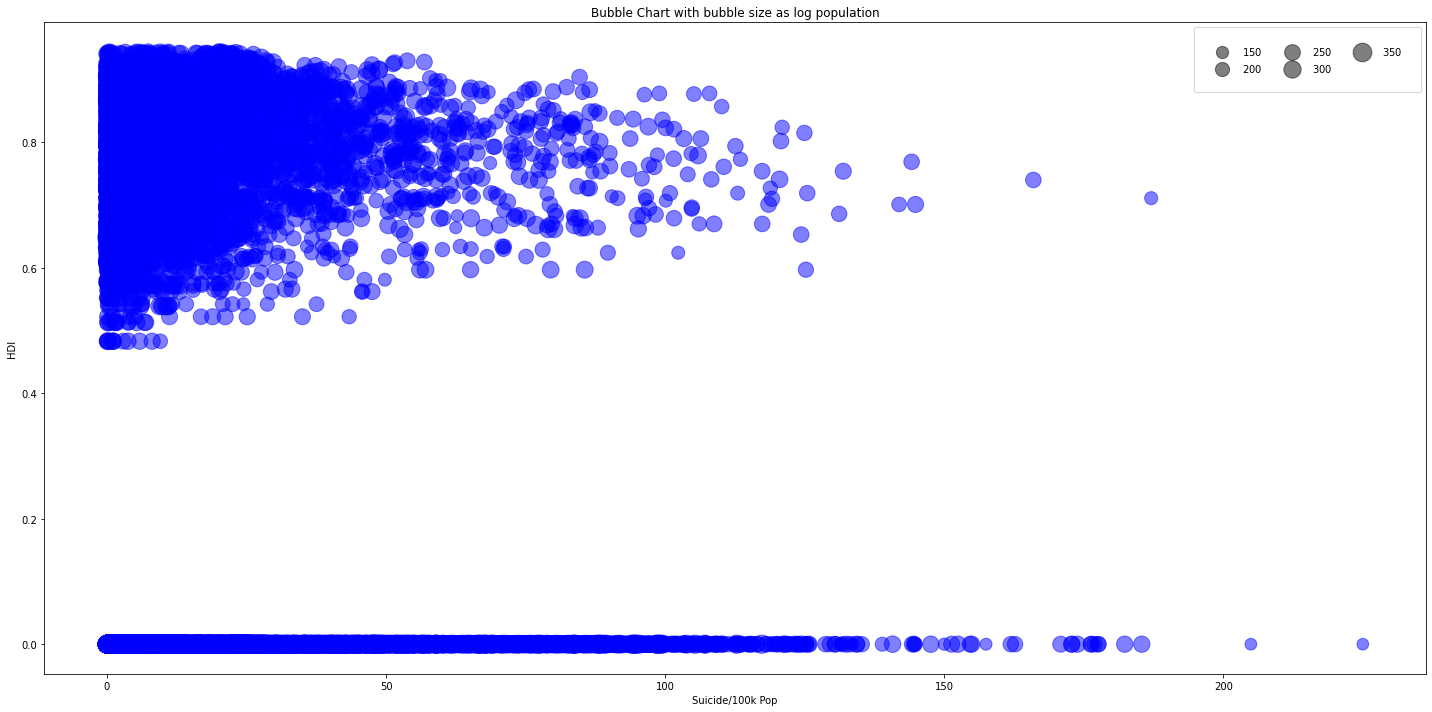

In [ ]:
y=data["HDI for year"]
z=np.log(data["population"])
x=data['Suicides100kPop']
plt.figure(figsize=(20,10))
ax = plt.scatter(x,y,s = z*20, c="blue",alpha=0.5)
plt.legend(*ax.legend_elements("sizes", num=5),ncol=3, frameon=True,borderpad = 1.8,handletextpad=1)
plt.xlabel('Suicide/100k Pop')
plt.ylabel('HDI')
plt.title('Bubble Chart with bubble size as log population')
plt.show()

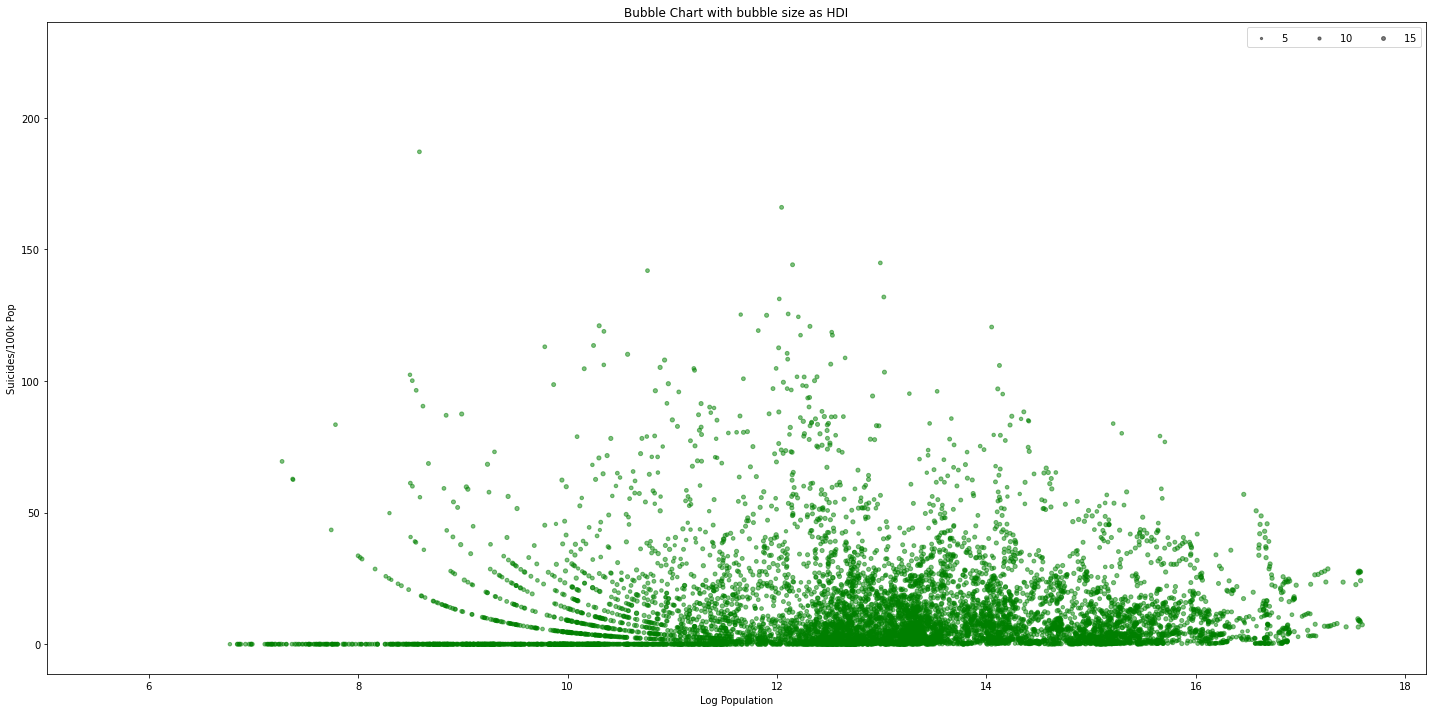

In [ ]:
z=data["HDI for year"]
x=np.log(data["population"])
y=data['Suicides100kPop']
plt.figure(figsize=(20,10))
ax = plt.scatter(x,y,s = z*20, c="green",alpha=0.5)
plt.legend(*ax.legend_elements("sizes", num=5),ncol=3, frameon=True,handlelength=2,handletextpad=1)
plt.xlabel('Log Population')
plt.ylabel('Suicides/100k Pop')
plt.title('Bubble Chart with bubble size as HDI')
plt.show()

As expected the HDI which measures the development of a country plays a key role in the analysis. The conclusions are however baffling because countries with too high or too low HDI are not too different in their behaviour

## Inspiration

I drew inspiration greatly from the documentation of the libraries and geeksforgeeks( I have listed some links below). Apart from that, my friends sarvadnya, dhruv, shivesh and tanmay were constant pillars of support. I would to extend my deepest sense of gratitide towards Prof. Amit Sethi for inspiring me to excel.

https://www.geeksforgeeks.org/python-pandas-dataframe-groupby/
https://www.geeksforgeeks.org/get-unique-values-from-a-column-in-pandas-dataframe/
https://sparkbyexamples.com/pandas/conver-pandas-column-to-list/#:~:text=tolist()%20you%20can%20convert,the%20column%20values%20to%20list.

https://datatofish.com/line-chart-python-matplotlib/

https://www.digitalocean.com/community/tutorials/python-convert-numpy-array-to-list

https://www.analyticsvidhya.com/blog/2020/08/exploratory-data-analysiseda-from-scratch-in-python/

Text(0.5, 1.0, 'Fitting Suicide Data to Gaussian')

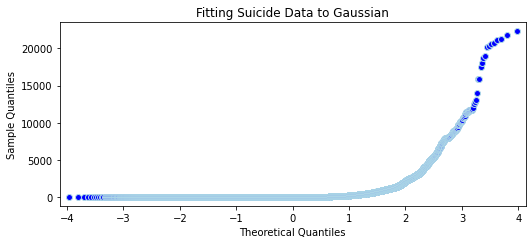

In [ ]:
fig = stat.qqplot(data.iloc[:,4], color = 'lightblue')
plt.title('Fitting Suicide Data to Gaussian')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


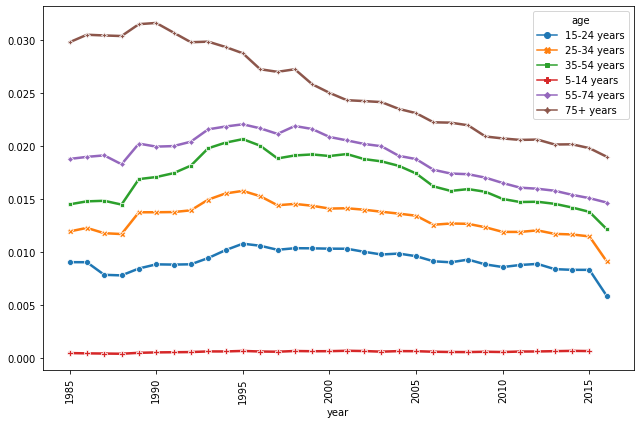

In [ ]:
df_age = data.groupby(["year","age"])["suicides_no", "population"].sum()
df_reset = df_age.copy().reset_index()
plt.figure(figsize=(9,6))
sb.lineplot("year", df_reset.suicides_no*100/df_reset.population, hue = "age",
             data = df_reset, linewidth = 2.5, style = "age", markers=True
            , dashes=False)
plt.xticks(rotation = 90)
plt.show()